<a href="https://colab.research.google.com/github/jerryshenfewcher/Cits4012/blob/main/ABSA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import data from Google Drive

1. 下载数据并加载数据

In [2]:
# Download from Github

!wget https://raw.githubusercontent.com/jerryshenfewcher/Cits4012/main/test.json
!wget https://raw.githubusercontent.com/jerryshenfewcher/Cits4012/main/train.json
!wget https://raw.githubusercontent.com/jerryshenfewcher/Cits4012/main/val.json
!ls

--2024-05-17 14:56:20--  https://raw.githubusercontent.com/jerryshenfewcher/Cits4012/main/test.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 141274 (138K) [text/plain]
Saving to: ‘test.json’

test.json           100%[===================>] 137.96K  --.-KB/s    in 0.02s   

2024-05-17 14:56:21 (6.03 MB/s) - ‘test.json’ saved [141274/141274]

--2024-05-17 14:56:21--  https://raw.githubusercontent.com/jerryshenfewcher/Cits4012/main/train.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1136800 (1.1M) [text/plain]
Saving to:

In [3]:
import json
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize


nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

2. 数据预处理

In [4]:
def fileopen(file):
  with open(file, 'r') as f:
    data = json.load(f)
    return data

test_data = fileopen('test.json')
train_data = fileopen('train.json')
val_data = fileopen('val.json')

print(test_data)
print(train_data)
print(val_data)

{'columns': ['sentence', 'aspect', 'polarity'], 'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 21

Data Preprocess

In [5]:
# These are just common English contractions.
contraction_dict = {
    "ain't": "is not", "aren't": "are not", "can't": "cannot", "'cause": "because", "could've": "could have",
    "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not",
    "hasn't": "has not", "haven't": "have not", "he'd": "he would", "he'll": "he will", "he's": "he is",
    "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would",
    "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have", "I'm": "I am", "I've": "I have",
    "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have", "i'm": "i am",
    "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will",
    "it'll've": "it will have", "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not",
    "might've": "might have", "mightn't": "might not", "mightn't've": "might not have", "must've": "must have",
    "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
    "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
    "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have",
    "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have",
    "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have", "so's": "so as",
    "this's": "this is", "that'd": "that would", "that'd've": "that would have", "that's": "that is",
    "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is",
    "they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have",
    "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would",
    "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have",
    "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is",
    "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
    "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
    "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
    "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
    "y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have",
    "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are",
    "you've": "you have"
}

def pre_process(data):
    output = []
    for sent_list in data["data"]:
        sent = sent_list[0].lower()  # Assuming the first element is the sentence
        for word, new_word in contraction_dict.items():
            sent = sent.replace(word, new_word)  # Dealing with contractions
        sent = re.sub(r'[^\w\s]', '', sent)  # Removing punctuation
        tokens = word_tokenize(sent)  # Tokenization
        aspect = sent_list[1]
        polarity = sent_list[2]
        output.append([tokens, [aspect], [polarity]])
    return output

# 预处理数据
train_token_list = pre_process(train_data)
test_token_list = pre_process(test_data)
val_token_list = pre_process(val_data)

# 分割数据
train_token_list, train_aspect_list, train_polarity_list = zip(*train_token_list)
test_token_list, test_aspect_list, test_polarity_list = zip(*test_token_list)
val_token_list, val_aspect_list, val_polarity_list = zip(*val_token_list)

train_token_list = list(train_token_list)
train_aspect_list = list(train_aspect_list)
train_polarity_list = list(train_polarity_list)

test_token_list = list(test_token_list)
test_aspect_list = list(test_aspect_list)
test_polarity_list = list(test_polarity_list)

val_token_list = list(val_token_list)
val_aspect_list = list(val_aspect_list)
val_polarity_list = list(val_polarity_list)

# 添加特殊标记
output_test_polarity_list = [["<BOS>"] + s for s in test_polarity_list]
target_test_polarity_list = [s + ["<EOS>"] for s in test_polarity_list]

output_train_polarity_list = [["<BOS>"] + s for s in train_polarity_list]
target_train_polarity_list = [s + ["<EOS>"] for s in train_polarity_list]

output_val_polarity_list = [["<BOS>"] + s for s in val_polarity_list]
target_val_polarity_list = [s + ["<EOS>"] for s in val_polarity_list]

print(output_test_polarity_list[0])


['<BOS>', 'neutral']


3. 创建词汇表

In [6]:
import gensim.downloader as api
# 加载预训练的Word2Vec模型
word2vec_model = api.load('glove-wiki-gigaword-100')  # 使用较小的GloVe模型，维度为100

# 创建词汇到索引的字典，并限制词汇表大小
word_to_ix = {"<BOS>": 0, "<EOS>": 1, "<PAD>": 2, "<UNK>": 3}
embedding_dim = word2vec_model.vector_size

for word in word2vec_model.index_to_key:
    if word not in word_to_ix:
        word_to_ix[word] = len(word_to_ix)
    if len(word_to_ix) >= 50000:  # 限制词汇表大小为50000
        break

# 在训练数据中添加未见单词
for sentence in train_token_list + test_token_list + output_train_polarity_list + output_test_polarity_list:
    for word in sentence:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)
            #word_to_ix[word] = word_to_ix["<UNK>"]

# 确保特殊标记 '<UNK>' 和 '<PAD>' 已添加到词汇表中
word_to_ix.setdefault('<UNK>', len(word_to_ix))
word_to_ix.setdefault('<PAD>', len(word_to_ix) + 1)

[==================================================] 100.0% 128.1/128.1MB downloaded


2

4. 将文本数据转换为索引

In [7]:
def to_index(data, to_ix):
    """Convert text data to index using the given vocabulary index map."""
    index_list = []
    for sent in data:
        # Convert each word in the sentence to its corresponding index.
        # Use the index for '<UNK>' if the word is not in the vocabulary.
        index_list.append([to_ix.get(w, to_ix['<UNK>']) for w in sent])
    return index_list

# Ensure special tokens '<UNK>' and '<PAD>' are added to the dictionary
word_to_ix.setdefault('<UNK>', len(word_to_ix))
word_to_ix.setdefault('<PAD>', len(word_to_ix) + 1)

# Convert training data to indices
input_index = to_index(train_token_list, word_to_ix)
output_index = to_index(output_train_polarity_list, word_to_ix)
target_index = to_index(target_train_polarity_list, word_to_ix)

# Print results to verify conversion
print("Training Input Indices (first 3):", input_index[:3])
print("Training Output Indices (first 3):", output_index[:3])
print("Training Target Indices (first 3):", target_index[:3])

# Convert test data to indices
test_input_index = to_index(test_token_list, word_to_ix)
test_output_index = to_index(output_test_polarity_list, word_to_ix)
test_target_index = to_index(target_test_polarity_list, word_to_ix)

# Print test data indices to verify conversion
print("Test Input Indices (first 3):", test_input_index[:3])
print("Test Output Indices (first 3):", test_output_index[:3])
print("Test Target Indices (first 3):", test_target_index[:3])

# 使用一个样例打印训练标签的前五个元素，方便了解数据结构
print("train_polarity_list (first 5 elements):")
for i in range(min(5, len(train_polarity_list))):  # 打印最多前五个元素
    print(f"Element {i}: {train_polarity_list[i]}")

# Verify if there are any indices that are out of the expected range (greater than vocab_size)
vocab_size = len(word_to_ix)
for idx_list in input_index + test_input_index:
    if any(idx >= vocab_size for idx in idx_list):
        print("Found index out of range in input data.")
        break

for idx_list in output_index + test_output_index:
    if any(idx >= vocab_size for idx in idx_list):
        print("Found index out of range in output data.")
        break

for idx_list in target_index + test_target_index:
    if any(idx >= vocab_size for idx in idx_list):
        print("Found index out of range in target data.")
        break

Training Input Indices (first 3): [[24, 418, 34, 4, 258, 3166, 139, 569, 45, 37, 44, 10, 4, 241, 104, 87, 85, 36, 226, 8, 4, 14832, 3945, 4350, 50, 4, 2641, 24, 98, 34, 124, 4, 245, 14, 85], [24, 418, 34, 4, 258, 3166, 139, 569, 45, 37, 44, 10, 4, 241, 104, 87, 85, 36, 226, 8, 4, 14832, 3945, 4350, 50, 4, 2641, 24, 98, 34, 124, 4, 245, 14, 85], [23785, 19, 2712, 23605, 65, 57, 1153, 33, 1156, 203, 14, 166, 9458]]
Training Output Indices (first 3): [[0, 1339], [0, 5880], [0, 1339]]
Training Target Indices (first 3): [[1339, 1], [5880, 1], [1339, 1]]
Test Input Indices (first 3): [[57, 392, 382, 9, 3227, 26, 4, 2073, 41, 83, 45, 44, 426, 44171, 7, 13529, 9, 40, 52, 25261, 45, 1302, 11, 7987, 7, 10956, 6823, 9, 67, 39, 63, 426, 10, 4, 7987, 4, 1037, 19, 2707, 21, 26862, 4, 14038, 19, 40, 155, 18779], [57, 392, 382, 9, 3227, 26, 4, 2073, 41, 83, 45, 44, 426, 44171, 7, 13529, 9, 40, 52, 25261, 45, 1302, 11, 7987, 7, 10956, 6823, 9, 67, 39, 63, 426, 10, 4, 7987, 4, 1037, 19, 2707, 21, 26862,

5. 拆分数据集

In [8]:
#  拆分训练集、验证集和测试集
from sklearn.model_selection import train_test_split

# 合并所有数据
all_token_list = train_token_list + val_token_list + test_token_list
all_aspect_list = train_aspect_list + val_aspect_list + test_aspect_list
all_polarity_list = train_polarity_list + val_polarity_list + test_polarity_list

# 先划分训练集和临时集（验证集+测试集）
train_tokens, temp_tokens, train_aspects, temp_aspects, train_polarities, temp_polarities = train_test_split(
    all_token_list, all_aspect_list, all_polarity_list, test_size=0.4, random_state=42
)

# 再划分验证集和测试集
val_tokens, test_tokens, val_aspects, test_aspects, val_polarities, test_polarities = train_test_split(
    temp_tokens, temp_aspects, temp_polarities, test_size=0.5, random_state=42
)

6. 创建张量

In [9]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
import torch.nn.functional as F

In [10]:
def create_tensors(data_list, to_ix, max_len):
    tensor_list = []
    for data in data_list:
        indexed = [to_ix.get(word, to_ix['<UNK>']) for word in data]
        indexed = indexed[:max_len]  # 截断到 max_len
        padding_length = max_len - len(indexed)
        indexed += [to_ix['<PAD>']] * padding_length  # 填充到 max_len 长度
        tensor = torch.tensor(indexed, dtype=torch.long)
        tensor_list.append(tensor)
    return tensor_list

label_mapping = {'neutral': 0, 'positive': 1, 'negative': 2}

def remap_labels(nested_labels, mapping):
    """Map string labels to integers using provided mapping and convert to tensor."""
    mapped_labels = [mapping[label[0]] for label in nested_labels]
    return torch.tensor(mapped_labels, dtype=torch.long)

In [11]:
# Here we simply use the maximum sentence length
max_len = max([len(s) for s in train_token_list] + [len(s) for s in target_train_polarity_list])

print(max_len)

67


In [12]:
# 打印部分`train_aspects`和`test_aspects`的原始数据
print("Original train_aspects:", train_aspect_list[:5])
print("Original test_aspects:", test_aspect_list[:5])

Original train_aspects: [['food'], ['place'], ['staff'], ['miscellaneous'], ['miscellaneous']]
Original test_aspects: [['place'], ['food'], ['food'], ['service'], ['staff']]


In [13]:
# 使用新词汇表进行数据处理
train_labels = remap_labels(train_polarity_list, label_mapping)
train_inputs = create_tensors(train_token_list, word_to_ix, max_len)
train_aspects = create_tensors(train_aspect_list, word_to_ix, max_len)

test_labels = remap_labels(test_polarity_list, label_mapping)
test_inputs = create_tensors(test_token_list, word_to_ix, max_len)
test_aspects = create_tensors(test_aspect_list, word_to_ix, max_len)

val_labels = remap_labels(val_polarity_list, label_mapping)
val_inputs = create_tensors(val_token_list, word_to_ix, max_len)
val_aspects = create_tensors(val_aspect_list, word_to_ix, max_len)

# 验证每个数据集的长度是否一致
assert len(train_inputs) == len(train_aspects) == len(train_labels), "Train dataset lengths are not equal!"
assert len(test_inputs) == len(test_aspects) == len(test_labels), "Test dataset lengths are not equal!"
assert len(val_inputs) == len(val_aspects) == len(val_labels), "Validation dataset lengths are not equal!"

# 打印前5个样例以进行调试
for i in range(5):
    print(f"Train Sample {i+1} - Token List: {train_token_list[i]}")
    print(f"Train Sample {i+1} - Aspect List: {train_aspect_list[i]}")
    print(f"Train Sample {i+1} - Processed Input Tensor: {train_inputs[i]}")
    print()

    print(f"Test Sample {i+1} - Token List: {test_token_list[i]}")
    print(f"Test Sample {i+1} - Aspect List: {test_aspect_list[i]}")
    print(f"Test Sample {i+1} - Processed Input Tensor: {test_inputs[i]}")
    print()

    print(f"Val Sample {i+1} - Token List: {val_token_list[i]}")
    print(f"Val Sample {i+1} - Aspect List: {val_aspect_list[i]}")
    print(f"Val Sample {i+1} - Processed Input Tensor: {val_inputs[i]}")
    print()

# 验证最大索引是否超出范围
max_train_input_index = max(max(seq) for seq in train_inputs)
max_test_input_index = max(max(seq) for seq in test_inputs)
max_val_input_index = max(max(seq) for seq in val_inputs)
max_train_aspect_index = max(max(seq) for seq in train_aspects)
max_test_aspect_index = max(max(seq) for seq in test_aspects)
max_val_aspect_index = max(max(seq) for seq in val_aspects)

print(f"Max train input index: {max_train_input_index}")
print(f"Max test input index: {max_test_input_index}")
print(f"Max val input index: {max_val_input_index}")
print(f"Max train aspect index: {max_train_aspect_index}")
print(f"Max test aspect index: {max_test_aspect_index}")
print(f"Max val aspect index: {max_val_aspect_index}")

if max(max_train_input_index, max_test_input_index, max_val_input_index, max_train_aspect_index, max_test_aspect_index, max_val_aspect_index) >= len(word_to_ix):
    raise ValueError("Some indices are out of the range of the embedding matrix.")

Train Sample 1 - Token List: ['it', 'might', 'be', 'the', 'best', 'sit', 'down', 'food', 'i', 'have', 'had', 'in', 'the', 'area', 'so', 'if', 'you', 'are', 'going', 'to', 'the', 'upright', 'citizen', 'brigade', 'or', 'the', 'garden', 'it', 'could', 'be', 'just', 'the', 'place', 'for', 'you']
Train Sample 1 - Aspect List: ['food']
Train Sample 1 - Processed Input Tensor: tensor([   24,   418,    34,     4,   258,  3166,   139,   569,    45,    37,
           44,    10,     4,   241,   104,    87,    85,    36,   226,     8,
            4, 14832,  3945,  4350,    50,     4,  2641,    24,    98,    34,
          124,     4,   245,    14,    85,     2,     2,     2,     2,     2,
            2,     2,     2,     2,     2,     2,     2,     2,     2,     2,
            2,     2,     2,     2,     2,     2,     2,     2,     2,     2,
            2,     2,     2,     2,     2,     2,     2])

Test Sample 1 - Token List: ['we', 'went', 'again', 'and', 'sat', 'at', 'the', 'bar', 'this', 'time'

# Model LSTM (RNN)

In [14]:
# 打印原始数据的前几条记录，检查数据结构是否一致
print("First few train token list entries:", train_token_list[:5])
print("First few train aspect list entries:", train_aspect_list[:5])
print("First few train polarity list entries:", train_polarity_list[:5])

print("First few test token list entries:", test_token_list[:5])
print("First few test aspect list entries:", test_aspect_list[:5])
print("First few test polarity list entries:", test_polarity_list[:5])

print("First few val token list entries:", val_token_list[:5])
print("First few val aspect list entries:", val_aspect_list[:5])
print("First few val polarity list entries:", val_polarity_list[:5])


First few train token list entries: [['it', 'might', 'be', 'the', 'best', 'sit', 'down', 'food', 'i', 'have', 'had', 'in', 'the', 'area', 'so', 'if', 'you', 'are', 'going', 'to', 'the', 'upright', 'citizen', 'brigade', 'or', 'the', 'garden', 'it', 'could', 'be', 'just', 'the', 'place', 'for', 'you'], ['it', 'might', 'be', 'the', 'best', 'sit', 'down', 'food', 'i', 'have', 'had', 'in', 'the', 'area', 'so', 'if', 'you', 'are', 'going', 'to', 'the', 'upright', 'citizen', 'brigade', 'or', 'the', 'garden', 'it', 'could', 'be', 'just', 'the', 'place', 'for', 'you'], ['hostess', 'was', 'extremely', 'accommodating', 'when', 'we', 'arrived', 'an', 'hour', 'early', 'for', 'our', 'reservation'], ['hostess', 'was', 'extremely', 'accommodating', 'when', 'we', 'arrived', 'an', 'hour', 'early', 'for', 'our', 'reservation'], ['we', 'were', 'a', 'couple', 'of', 'minutes', 'late', 'for', 'our', 'reservation', 'and', 'minus', 'one', 'guest', 'but', 'we', 'did', 'not', 'think', 'we', 'deserved', 'the', 'a

不知道这个可视化放这儿合不合适，但就先放这儿了xdm

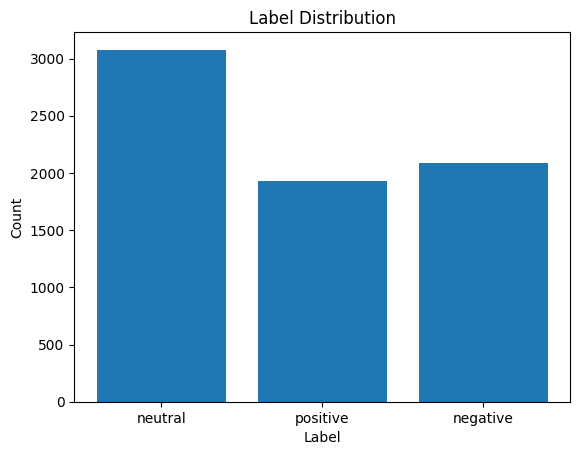

In [15]:
import matplotlib.pyplot as plt
# 标签分布可视化函数
def plot_label_distribution(labels, label_mapping):
    label_counts = [0] * len(label_mapping)
    for label in labels:
        label_counts[label_mapping[label[0]]] += 1

    label_names = list(label_mapping.keys())
    plt.bar(label_names, label_counts)
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.title('Label Distribution')
    plt.show()

# 可视化训练标签分布
plot_label_distribution(train_polarity_list, label_mapping)

In [16]:
print(len(train_token_list), len(train_aspect_list), len(train_polarity_list))
print(len(test_token_list), len(test_aspect_list), len(test_polarity_list))
print(len(val_token_list), len(val_aspect_list), len(val_polarity_list))
print(len(train_inputs), len(train_aspects), len(train_labels))
print(len(test_inputs), len(test_aspects), len(test_labels))
print(len(val_inputs), len(val_aspects), len(val_labels))


7090 7090 7090
901 901 901
888 888 888
7090 7090 7090
901 901 901
888 888 888


定义基于lstm的rnn


7. 创建数据加载器

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn.functional as F

创建数据集

In [18]:
# 更新数据加载器
import torch
from torch.utils.data import Dataset, DataLoader

class AspectSentimentDataset(Dataset):
    def __init__(self, texts, aspects, labels):
        self.texts = texts
        self.aspects = [aspect[0] for aspect in aspects]
        self.labels = labels

        # 检查数据集长度是否一致
        assert len(self.texts) == len(self.aspects) == len(self.labels), "Dataset lengths are not equal!"

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        if idx >= len(self.texts):
            print(f"Index out of range: {idx}, Dataset length: {len(self.texts)}")
        return self.texts[idx], self.aspects[idx], self.labels[idx]

# 创建数据集和数据加载器
train_dataset = AspectSentimentDataset(train_inputs, train_aspects, train_labels)
val_dataset = AspectSentimentDataset(val_inputs, val_aspects, val_labels)
test_dataset = AspectSentimentDataset(test_inputs, test_aspects, test_labels)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [19]:
# 获取词汇表大小
max_index = 0
for texts, aspects, labels in train_loader:
    max_index = max(max_index, texts.max().item(), aspects.max().item())  # Update max_index if current max is higher

vocab_size = max_index + 1

In [20]:
# 可删
# 打印前几个 batch 的数据以确认数据加载器是否正常工作
for batch_idx, (texts, aspects, labels) in enumerate(train_loader):
    print(f"Batch {batch_idx}: texts size: {texts.size()}, aspects size: {aspects.size()}, labels size: {labels.size()}")
    if batch_idx >= 1:  # 只打印前2个 batch 的数据
        break

Batch 0: texts size: torch.Size([32, 67]), aspects size: torch.Size([32]), labels size: torch.Size([32])
Batch 1: texts size: torch.Size([32, 67]), aspects size: torch.Size([32]), labels size: torch.Size([32])


没有注意力机制的模型


In [21]:
class RNNModelWithoutAttention(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, num_layers=1, device='cpu'):
        super(RNNModelWithoutAttention, self).__init__()
        self.device = device
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.text_embedding = nn.Embedding(vocab_size, embedding_dim)
        self.aspect_embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.LSTM(embedding_dim * 2, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.to(device)

    def forward(self, texts, aspects):
        text_embedded = self.text_embedding(texts)  # [batch_size, seq_length, embedding_dim]
        aspect_embedded = self.aspect_embedding(aspects).unsqueeze(1)  # [batch_size, 1, embedding_dim]

        # 重复 aspect_embedded 以匹配 text_embedded 的序列长度
        aspect_embedded = aspect_embedded.repeat(1, text_embedded.size(1), 1)  # [batch_size, seq_length, embedding_dim]

        combined = torch.cat((text_embedded, aspect_embedded), dim=2)  # [batch_size, seq_length, embedding_dim * 2]
        rnn_outputs, _ = self.rnn(combined)  # [batch_size, seq_length, hidden_dim]
        output = self.fc(rnn_outputs[:, -1, :])  # [batch_size, output_dim]
        return output

有注意力机制的模型


In [22]:
class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super(Attention, self).__init__()
        self.hidden_dim = hidden_dim
        self.attention_weights_layer = nn.Linear(hidden_dim, 1)

    def forward(self, rnn_outputs):
        attention_scores = self.attention_weights_layer(rnn_outputs).squeeze(2)
        attention_weights = F.softmax(attention_scores, dim=1).unsqueeze(2)
        weighted_rnn_outputs = rnn_outputs * attention_weights
        context_vector = weighted_rnn_outputs.sum(dim=1)
        return context_vector, attention_weights

class RNNModelWithAttention(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, num_layers=1, device='cpu'):
        super(RNNModelWithAttention, self).__init__()
        self.device = device
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.text_embedding = nn.Embedding(vocab_size, embedding_dim)
        self.aspect_embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.LSTM(embedding_dim * 2, hidden_dim, num_layers, batch_first=True)
        self.attention = Attention(hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.to(device)

    def forward(self, texts, aspects):
        text_embedded = self.text_embedding(texts)
        aspect_embedded = self.aspect_embedding(aspects).unsqueeze(1)
        aspect_embedded = aspect_embedded.repeat(1, text_embedded.size(1), 1)
        combined = torch.cat((text_embedded, aspect_embedded), dim=2)
        rnn_outputs, _ = self.rnn(combined)
        context_vector, attention_weights = self.attention(rnn_outputs)
        output = self.fc(context_vector)
        return output, attention_weights

双向LSTM


In [23]:
# 模型定义
class BiLSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, num_layers=1, device='cpu'):
        super(BiLSTMModel, self).__init__()
        self.device = device
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.text_embedding = nn.Embedding(vocab_size, embedding_dim)
        self.aspect_embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.LSTM(embedding_dim * 2, hidden_dim, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
        self.to(device)

    def forward(self, texts, aspects):
        text_embedded = self.text_embedding(texts)  # [batch_size, seq_length, embedding_dim]
        aspect_embedded = self.aspect_embedding(aspects).unsqueeze(1)  # [batch_size, 1, embedding_dim]

        # 重复 aspect_embedded 以匹配 text_embedded 的序列长度
        aspect_embedded = aspect_embedded.repeat(1, text_embedded.size(1), 1)  # [batch_size, seq_length, embedding_dim]

        combined = torch.cat((text_embedded, aspect_embedded), dim=2)  # [batch_size, seq_length, embedding_dim * 2]
        rnn_outputs, _ = self.rnn(combined)  # [batch_size, seq_length, hidden_dim * 2]
        output = self.fc(rnn_outputs[:, -1, :])  # [batch_size, output_dim]
        return output

In [24]:
# 创建两个模型实例
vocab_size = len(word_to_ix)
embedding_dim = 100
hidden_dim = 128
output_dim = 3
batch_size = 32
num_layers = 2

In [25]:
# 假设train_loader和test_loader已经定义并初始化
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [26]:
model_with_attention = RNNModelWithAttention(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers, device=device)
model_without_attention = RNNModelWithoutAttention(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers, device=device)
model_bilstm = BiLSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers, device)


In [27]:
'''#可删
# 创建虚拟数据进行测试
batch_size = 2
seq_length = 10
texts = torch.randint(0, vocab_size, (batch_size, seq_length)).to(device)
aspects = torch.randint(0, vocab_size, (batch_size,)).to(device)

# 调用 forward 方法进行测试
model_with_attention(texts, aspects)'''

'#可删\n# 创建虚拟数据进行测试\nbatch_size = 2\nseq_length = 10\ntexts = torch.randint(0, vocab_size, (batch_size, seq_length)).to(device)\naspects = torch.randint(0, vocab_size, (batch_size,)).to(device)\n\n# 调用 forward 方法进行测试\nmodel_with_attention(texts, aspects)'

In [28]:
# 设定优化器和损失函数
optimizer_with_attention = optim.Adam(model_with_attention.parameters(), lr=0.001)
optimizer_without_attention = optim.Adam(model_without_attention.parameters(), lr=0.001)
optimizer_bilstm = optim.Adam(model_bilstm.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [29]:
# 定义评估函数
def evaluate_model(model, data_loader, criterion, device, attention=False):
    model.eval()
    total_loss = 0
    correct_predictions = 0
    labels_list = []
    preds_list = []

    with torch.no_grad():
        for texts, aspects, labels in data_loader:
            texts, aspects, labels = texts.to(device), aspects.to(device), labels.to(device)
            if attention:
                outputs, _ = model(texts, aspects)  # 有注意力机制的模型返回两个值
            else:
                outputs = model(texts, aspects)  # 没有注意力机制的模型只返回一个值

            # 确保 outputs 是一个张量，而不是一个元组
            if isinstance(outputs, tuple):
                outputs = outputs[0]

            # 如果使用NLLLoss，应用log_softmax
            if isinstance(criterion, nn.NLLLoss):
                outputs = F.log_softmax(outputs, dim=1)

            loss = criterion(outputs, labels)
            total_loss += loss.item()

            preds = outputs.argmax(dim=1)
            correct_predictions += (preds == labels).sum().item()

            labels_list.extend(labels.cpu().numpy())
            preds_list.extend(preds.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    accuracy = correct_predictions / len(data_loader.dataset)
    return avg_loss, accuracy, labels_list, preds_list


In [30]:
# 定义训练函数
def train_model(model, optimizer, train_loader, val_loader, criterion, device, num_epochs=5, attention=False):
    model.train()
    train_loss_history = []
    val_loss_history = []
    train_acc_history = []
    val_acc_history = []

    all_attention_weights = []  # 用于存储所有注意力权重

    for epoch in range(num_epochs):
        total_loss = 0
        correct_predictions = 0
        for texts, aspects, labels in train_loader:
            texts, aspects, labels = texts.to(device), aspects.to(device), labels.to(device)
            optimizer.zero_grad()

            if attention:
                outputs, attention_weights = model(texts, aspects)
                all_attention_weights.append(attention_weights.detach().cpu().numpy())  # 保存注意力权重
            else:
                outputs = model(texts, aspects)

            # 如果使用NLLLoss，应用log_softmax
            if isinstance(criterion, nn.NLLLoss):
                outputs = F.log_softmax(outputs, dim=1)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            predictions = outputs.argmax(dim=1)
            correct_predictions += (predictions == labels).sum().item()

        avg_loss = total_loss / len(train_loader)
        accuracy = correct_predictions / len(train_loader.dataset)

        train_loss_history.append(avg_loss)
        train_acc_history.append(accuracy)

        # 验证模型
        val_loss, val_accuracy, _, _ = evaluate_model(model, val_loader, criterion, device, attention)
        val_loss_history.append(val_loss)
        val_acc_history.append(val_accuracy)

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_loss:.4f}, Train Accuracy: {accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

    if attention:
        all_attention_weights = np.concatenate(all_attention_weights, axis=0)  # 合并所有 batch 的注意力权重
        return train_loss_history, val_loss_history, train_acc_history, val_acc_history, all_attention_weights
    else:
        return train_loss_history, val_loss_history, train_acc_history, val_acc_history


In [31]:
num_epochs = 5

# 训练带注意力机制的模型，并接收注意力权重
train_loss_history_with_attention, val_loss_history_with_attention, train_acc_history_with_attention, val_acc_history_with_attention, attention_weights_with_attention = train_model(
    model_with_attention, optimizer_with_attention, train_loader, val_loader, criterion, device, num_epochs, attention=True)


Epoch [1/5], Train Loss: 0.9291, Train Accuracy: 0.5924, Val Loss: 0.8885, Val Accuracy: 0.6104
Epoch [2/5], Train Loss: 0.8611, Train Accuracy: 0.6303, Val Loss: 0.8215, Val Accuracy: 0.6284
Epoch [3/5], Train Loss: 0.8086, Train Accuracy: 0.6485, Val Loss: 0.7812, Val Accuracy: 0.6396
Epoch [4/5], Train Loss: 0.7475, Train Accuracy: 0.6818, Val Loss: 0.7555, Val Accuracy: 0.6622
Epoch [5/5], Train Loss: 0.6654, Train Accuracy: 0.7224, Val Loss: 0.7426, Val Accuracy: 0.6802


In [32]:
# 训练不带注意力机制的模型
train_loss_history_without_attention, val_loss_history_without_attention, train_acc_history_without_attention, val_acc_history_without_attention = train_model(
    model_without_attention, optimizer_without_attention, train_loader, val_loader, criterion, device, num_epochs)

Epoch [1/5], Train Loss: 0.9371, Train Accuracy: 0.5831, Val Loss: 0.9101, Val Accuracy: 0.5991
Epoch [2/5], Train Loss: 0.9260, Train Accuracy: 0.5910, Val Loss: 0.9052, Val Accuracy: 0.5991
Epoch [3/5], Train Loss: 0.9238, Train Accuracy: 0.5906, Val Loss: 0.9092, Val Accuracy: 0.5991
Epoch [4/5], Train Loss: 0.9233, Train Accuracy: 0.5929, Val Loss: 0.9136, Val Accuracy: 0.6025
Epoch [5/5], Train Loss: 0.9233, Train Accuracy: 0.5917, Val Loss: 0.9049, Val Accuracy: 0.5991


In [33]:
# 训练双向LSTM模型
train_loss_history_bilstm, val_loss_history_bilstm, train_acc_history_bilstm, val_acc_history_bilstm = train_model(
    model_bilstm, optimizer_bilstm, train_loader, val_loader, criterion, device, num_epochs)

Epoch [1/5], Train Loss: 0.9344, Train Accuracy: 0.5870, Val Loss: 0.9130, Val Accuracy: 0.6025
Epoch [2/5], Train Loss: 0.9259, Train Accuracy: 0.5924, Val Loss: 0.9075, Val Accuracy: 0.5991
Epoch [3/5], Train Loss: 0.9249, Train Accuracy: 0.5918, Val Loss: 0.9054, Val Accuracy: 0.5991
Epoch [4/5], Train Loss: 0.9240, Train Accuracy: 0.5914, Val Loss: 0.8999, Val Accuracy: 0.6025
Epoch [5/5], Train Loss: 0.9231, Train Accuracy: 0.5915, Val Loss: 0.8987, Val Accuracy: 0.5991


In [34]:
'''# 预处理数据
train_token_list = pre_process(train_data)
test_token_list = pre_process(test_data)
val_token_list = pre_process(val_data)

# 确保所有样本长度一致
def pad_sentences(token_list, max_len, pad_token="<PAD>"):
    for i in range(len(token_list)):
        if len(token_list[i]) < max_len:
            token_list[i] += [pad_token] * (max_len - len(token_list[i]))
        else:
            token_list[i] = token_list[i][:max_len]
    return token_list

# 确保所有样本长度为 max_len
train_token_list = pad_sentences(train_token_list, max_len)
test_token_list = pad_sentences(test_token_list, max_len)
val_token_list = pad_sentences(val_token_list, max_len)

# 检查 `train_token_list` 的长度
print("Checking train_token_list lengths after padding:")
for i in range(5):
    print(f"Sample {i} length: {len(train_token_list[i])}")'''


'# 预处理数据\ntrain_token_list = pre_process(train_data)\ntest_token_list = pre_process(test_data)\nval_token_list = pre_process(val_data)\n\n# 确保所有样本长度一致\ndef pad_sentences(token_list, max_len, pad_token="<PAD>"):\n    for i in range(len(token_list)):\n        if len(token_list[i]) < max_len:\n            token_list[i] += [pad_token] * (max_len - len(token_list[i]))\n        else:\n            token_list[i] = token_list[i][:max_len]\n    return token_list\n\n# 确保所有样本长度为 max_len\ntrain_token_list = pad_sentences(train_token_list, max_len)\ntest_token_list = pad_sentences(test_token_list, max_len)\nval_token_list = pad_sentences(val_token_list, max_len)\n\n# 检查 `train_token_list` 的长度\nprint("Checking train_token_list lengths after padding:")\nfor i in range(5):\n    print(f"Sample {i} length: {len(train_token_list[i])}")'

Attention weights shape: (35450, 67, 1)
Sample 0 tokens length: 35
Attention weights shape: (35450, 67, 1)


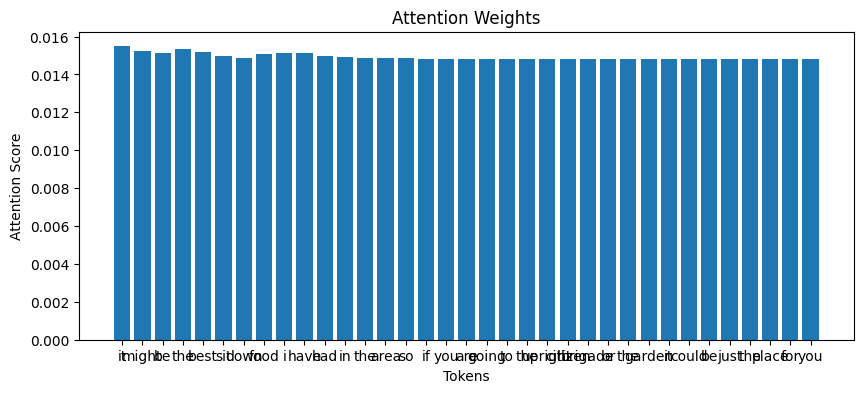

After visualization:
Sample 0 length: 35
Sample 1 length: 35
Sample 2 length: 13
Sample 3 length: 13
Sample 4 length: 28


In [35]:
import matplotlib.pyplot as plt
import numpy as np

# 定义可视化注意力权重的函数
def plot_attention_weights(attention_weights, sample_idx, tokens):
    # 将注意力权重转换为NumPy数组
    attention_weights = np.array(attention_weights)

    # 确保 attention_weights 形状为 [num_samples, seq_length, 1]
    print(f"Attention weights shape: {attention_weights.shape}")

    # 移除最后一维
    attention_weights = np.squeeze(attention_weights, axis=-1)

    # 获取第 sample_idx 个样本的注意力权重
    attention_scores = attention_weights[sample_idx]

    # 检查 tokens 的长度是否与注意力权重的长度一致
    if len(tokens) != attention_scores.shape[0]:
        print(f"Warning: Tokens length ({len(tokens)}) does not match attention weights length ({attention_scores.shape[0]}). Padding tokens with '<PAD>'.")

        # 如果注意力权重长度大于tokens长度，随机选择若干个注意力权重
        if attention_scores.shape[0] > len(tokens):
            indices = np.linspace(0, attention_scores.shape[0] - 1, len(tokens), dtype=int)
            attention_scores = attention_scores[indices]
        # 如果注意力权重长度小于tokens长度，重复最后一个注意力权重
        else:
            padding_length = len(tokens) - attention_scores.shape[0]
            attention_scores = np.concatenate([attention_scores, np.repeat(attention_scores[-1], padding_length)])

    plt.figure(figsize=(10, 4))
    plt.bar(range(len(tokens)), attention_scores, tick_label=tokens)
    plt.xlabel('Tokens')
    plt.ylabel('Attention Score')
    plt.title('Attention Weights')
    plt.show()

# 确认注意力权重的形状
print(f"Attention weights shape: {attention_weights_with_attention.shape}")

# 选择一个样本进行可视化
sample_idx = 0  # 选择第一个样本
tokens = train_token_list[sample_idx]  # 获取对应的tokens

# 打印 tokens 的长度
print(f"Sample {sample_idx} tokens length: {len(tokens)}")

# 绘制注意力权重
plot_attention_weights(attention_weights_with_attention, sample_idx, tokens)

# 再次检查 `train_token_list` 的长度
print("After visualization:")
for i in range(5):
    print(f"Sample {i} length: {len(train_token_list[i])}")


In [36]:
# 保存模型
torch.save(model_with_attention.state_dict(), 'model_with_attention.pth')
torch.save(model_without_attention.state_dict(), 'model_without_attention.pth')
torch.save(model_bilstm.state_dict(), 'model_bilstm.pth')

In [38]:
# 创建新的模型实例
loaded_model_with_attention = RNNModelWithAttention(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers, device=device)
loaded_model_without_attention = RNNModelWithoutAttention(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers, device=device)
loaded_model_bilstm = BiLSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers, device=device)

# 加载模型权重
loaded_model_with_attention.load_state_dict(torch.load('model_with_attention.pth'))
loaded_model_without_attention.load_state_dict(torch.load('model_without_attention.pth'))
loaded_model_bilstm.load_state_dict(torch.load('model_bilstm.pth'))

# 将模型移动到相应设备
loaded_model_with_attention.to(device)
loaded_model_without_attention.to(device)
loaded_model_bilstm.to(device)

BiLSTMModel(
  (text_embedding): Embedding(51903, 100)
  (aspect_embedding): Embedding(51903, 100)
  (rnn): LSTM(200, 128, num_layers=2, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=256, out_features=3, bias=True)
)

In [39]:
# 评估模型
loss_with_attention, acc_with_attention, labels_with_attention, preds_with_attention = evaluate_model(loaded_model_with_attention, test_loader, criterion, device, attention=True)
loss_without_attention, acc_without_attention, labels_without_attention, preds_without_attention = evaluate_model(loaded_model_without_attention, test_loader, criterion, device)
loss_bilstm, acc_bilstm, labels_bilstm, preds_bilstm = evaluate_model(loaded_model_bilstm, test_loader, criterion, device)

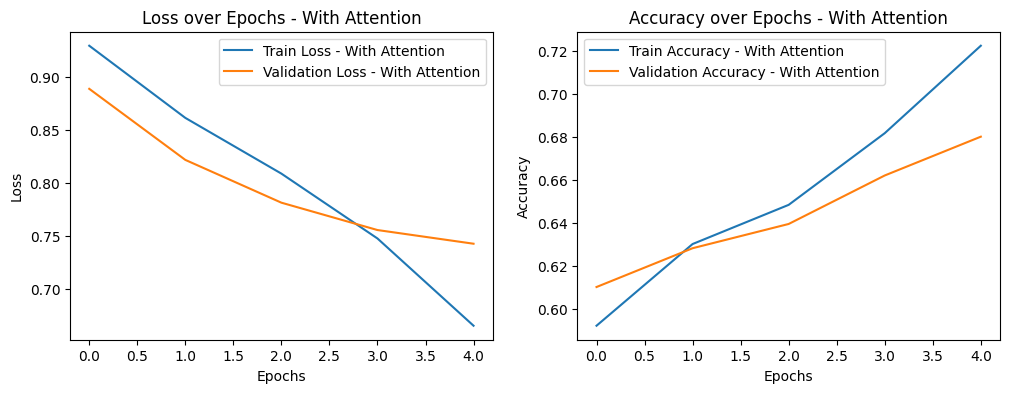

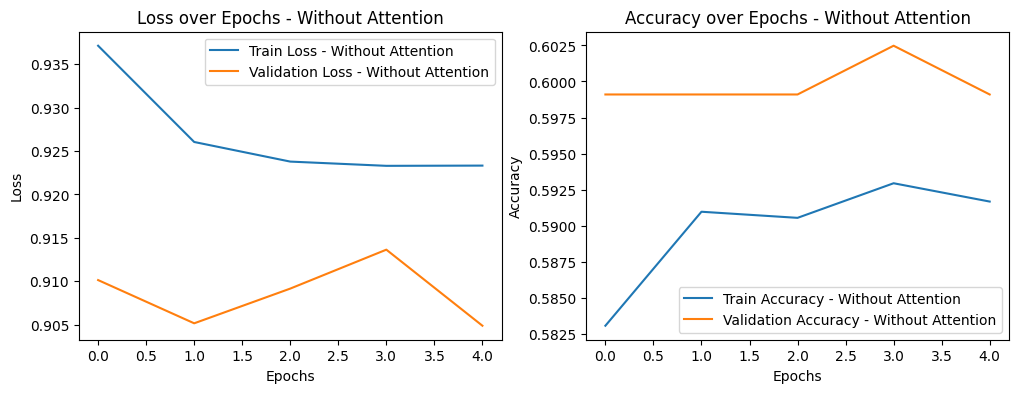

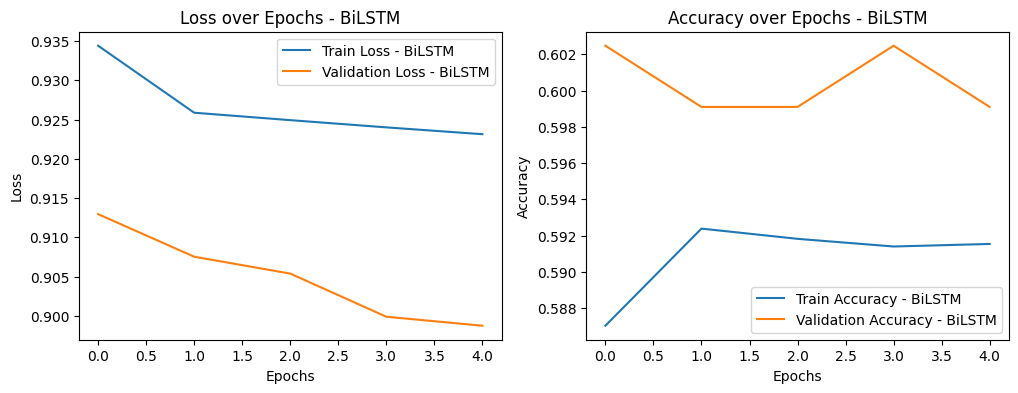

In [40]:
import matplotlib.pyplot as plt

# 定义训练过程的绘图函数
def plot_training_history(train_loss_history, val_loss_history, train_acc_history, val_acc_history, model_name):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_loss_history, label=f'Train Loss - {model_name}')
    plt.plot(val_loss_history, label=f'Validation Loss - {model_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Loss over Epochs - {model_name}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_acc_history, label=f'Train Accuracy - {model_name}')
    plt.plot(val_acc_history, label=f'Validation Accuracy - {model_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy over Epochs - {model_name}')
    plt.legend()

    plt.show()

# 绘制每个模型的训练过程历史图
plot_training_history(train_loss_history_with_attention, val_loss_history_with_attention, train_acc_history_with_attention, val_acc_history_with_attention, 'With Attention')
plot_training_history(train_loss_history_without_attention, val_loss_history_without_attention, train_acc_history_without_attention, val_acc_history_without_attention, 'Without Attention')
plot_training_history(train_loss_history_bilstm, val_loss_history_bilstm, train_acc_history_bilstm, val_acc_history_bilstm, 'BiLSTM')

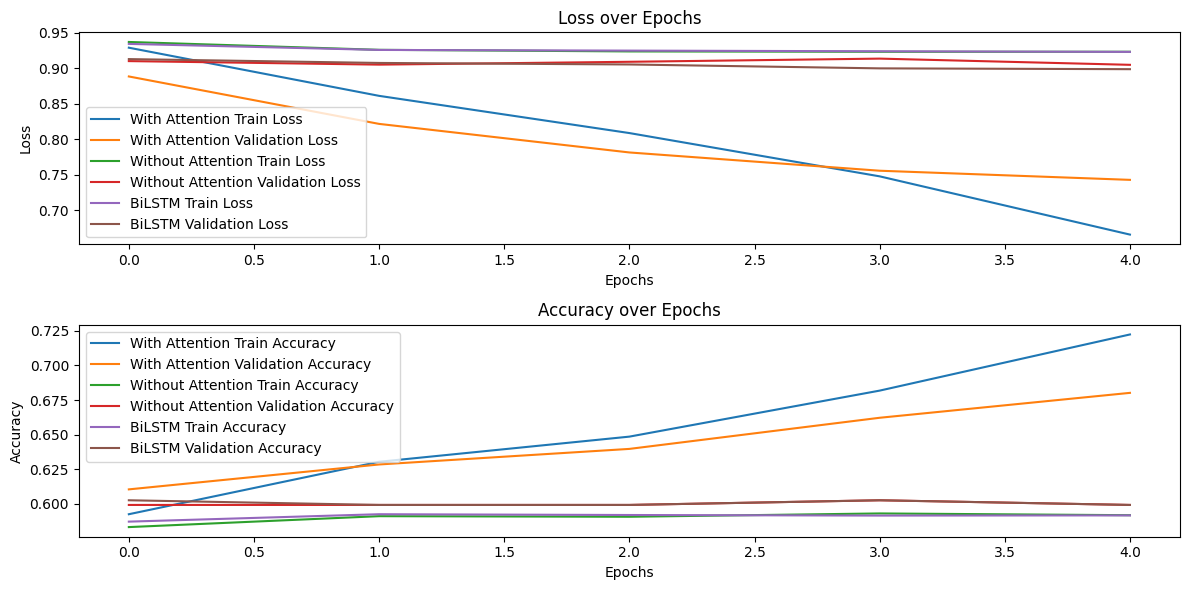

In [41]:
def plot_model_performance(train_loss_histories, val_loss_histories, train_acc_histories, val_acc_histories, model_names):
    plt.figure(figsize=(12, 6))

    for i, model_name in enumerate(model_names):
        plt.subplot(2, 1, 1)
        plt.plot(train_loss_histories[i], label=f'{model_name} Train Loss')
        plt.plot(val_loss_histories[i], label=f'{model_name} Validation Loss')

        plt.subplot(2, 1, 2)
        plt.plot(train_acc_histories[i], label=f'{model_name} Train Accuracy')
        plt.plot(val_acc_histories[i], label=f'{model_name} Validation Accuracy')

    plt.subplot(2, 1, 1)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 模型名称
model_names = ['With Attention', 'Without Attention', 'BiLSTM']

# 绘制性能比较图
plot_model_performance(
    [train_loss_history_with_attention, train_loss_history_without_attention, train_loss_history_bilstm],
    [val_loss_history_with_attention, val_loss_history_without_attention, val_loss_history_bilstm],
    [train_acc_history_with_attention, train_acc_history_without_attention, train_acc_history_bilstm],
    [val_acc_history_with_attention, val_acc_history_without_attention, val_acc_history_bilstm],
    model_names
)



In [42]:
# 打印分类报告
print("Model with Attention:")
print(classification_report(labels_with_attention, preds_with_attention))
print("Model without Attention:")
print(classification_report(labels_without_attention, preds_without_attention))
print("BiLSTM Model:")
print(classification_report(labels_bilstm, preds_bilstm))

Model with Attention:
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       393
           1       0.52      0.51      0.52       245
           2       0.64      0.61      0.63       263

    accuracy                           0.65       901
   macro avg       0.63      0.63      0.63       901
weighted avg       0.65      0.65      0.65       901

Model without Attention:
              precision    recall  f1-score   support

           0       0.59      0.94      0.73       393
           1       0.41      0.05      0.09       245
           2       0.60      0.56      0.58       263

    accuracy                           0.59       901
   macro avg       0.53      0.52      0.47       901
weighted avg       0.54      0.59      0.51       901

BiLSTM Model:
              precision    recall  f1-score   support

           0       0.59      0.94      0.73       393
           1       0.41      0.05      0.09       245
           2  

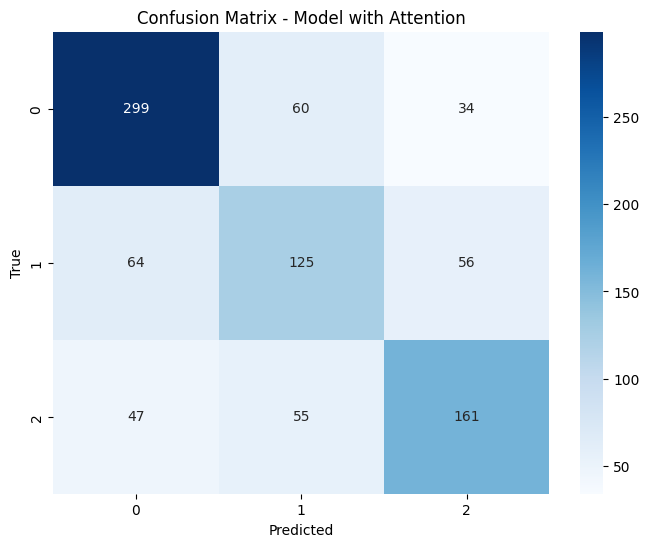

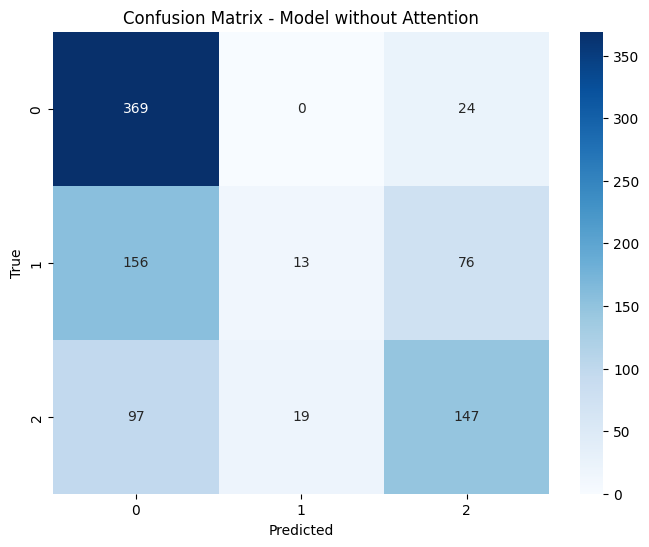

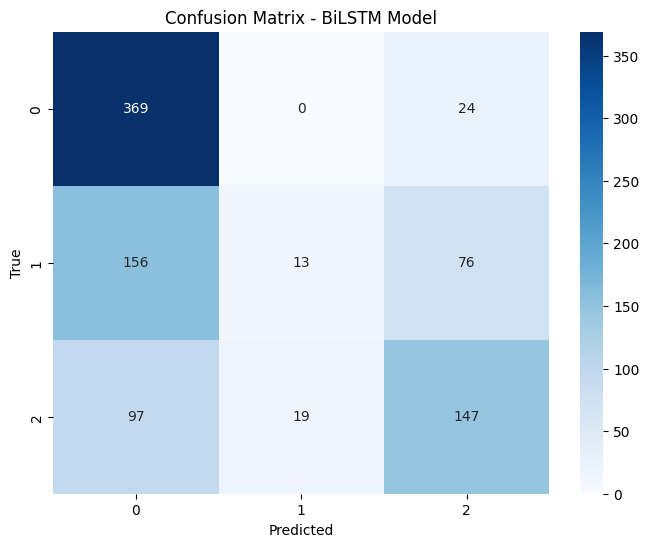

In [43]:
# 可视化混淆矩阵
def plot_confusion_matrix(labels, preds, title):
    cm = confusion_matrix(labels, preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(labels_with_attention, preds_with_attention, "Confusion Matrix - Model with Attention")
plot_confusion_matrix(labels_without_attention, preds_without_attention, "Confusion Matrix - Model without Attention")
plot_confusion_matrix(labels_bilstm, preds_bilstm, "Confusion Matrix - BiLSTM Model")


In [44]:
'''import torch
import plotly.express as px

# 创建 ix_to_word 字典
ix_to_word = {v: k for k, v in word_to_ix.items()}

# 可视化函数
def visualize_attention_interactive(text_ids, weights, ix_to_word):
    text = [ix_to_word.get(id, '<UNK>') for id in text_ids]
    weights = weights.squeeze().cpu().detach().numpy()

    fig = px.imshow([weights], labels=dict(color="Attention Weight"), x=text)
    fig.update_xaxes(side="top")
    fig.show()

# 使用模型进行评估
model.eval()
with torch.no_grad():
    for texts, aspects, labels in DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=0):
        texts, aspects, labels = texts.to(device), aspects.to(device), labels.to(device)
        outputs, weights = model(texts, aspects)
        if weights is not None:
            # 只显示第一个batch的前五个样本
            for i in range(min(5, len(texts))):
                text_sample = texts[i].tolist()
                weight_sample = weights[i]
                visualize_attention_interactive(text_sample, weight_sample, ix_to_word)
            break  # 只显示第一个batch

# 检查训练和测试数据集中的所有词汇是否在词汇表中
def validate_word_index(data_list, word_to_ix):
    for sent in data_list:
        for word in sent:
            if word not in word_to_ix:
                print(f"Word '{word}' not in vocabulary")

validate_word_index(train_token_list, word_to_ix)
validate_word_index(test_token_list, word_to_ix)
validate_word_index(output_train_polarity_list, word_to_ix)
validate_word_index(output_test_polarity_list, word_to_ix)'''


'import torch\nimport plotly.express as px\n\n# 创建 ix_to_word 字典\nix_to_word = {v: k for k, v in word_to_ix.items()}\n\n# 可视化函数\ndef visualize_attention_interactive(text_ids, weights, ix_to_word):\n    text = [ix_to_word.get(id, \'<UNK>\') for id in text_ids]\n    weights = weights.squeeze().cpu().detach().numpy()\n\n    fig = px.imshow([weights], labels=dict(color="Attention Weight"), x=text)\n    fig.update_xaxes(side="top")\n    fig.show()\n\n# 使用模型进行评估\nmodel.eval()\nwith torch.no_grad():\n    for texts, aspects, labels in DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=0):\n        texts, aspects, labels = texts.to(device), aspects.to(device), labels.to(device)\n        outputs, weights = model(texts, aspects)\n        if weights is not None:\n            # 只显示第一个batch的前五个样本\n            for i in range(min(5, len(texts))):\n                text_sample = texts[i].tolist()\n                weight_sample = weights[i]\n                visualize_attention_interactive

Experience

# Testing

3.5 Experiments
This section should contain: Dataset Description describe the dataset and include any dataset analysis you have done.
这一栏代码应该可以放到最上面去（都行）

In [46]:
import torch
from torch.utils.data import Dataset, DataLoader
from collections import Counter

def dataset_description(dataset, name):
    print(f"Dataset: {name}")
    print(f"Number of samples: {len(dataset)}")
    sample_texts, sample_aspects, sample_labels = next(iter(DataLoader(dataset, batch_size=5)))
    print(f"Sample texts: {sample_texts}")
    print(f"Sample aspects: {sample_aspects}")
    print(f"Sample labels: {sample_labels}")
    print(f"Label distribution: {Counter([label.item() for _, _, label in dataset])}")

dataset_description(train_dataset, "Train Dataset")
dataset_description(val_dataset, "Validation Dataset")
dataset_description(test_dataset, "Test Dataset")

Dataset: Train Dataset
Number of samples: 7090
Sample texts: tensor([[   24,   418,    34,     4,   258,  3166,   139,   569,    45,    37,
            44,    10,     4,   241,   104,    87,    85,    36,   226,     8,
             4, 14832,  3945,  4350,    50,     4,  2641,    24,    98,    34,
           124,     4,   245,    14,    85,     2,     2,     2,     2,     2,
             2,     2,     2,     2,     2,     2,     2,     2,     2,     2,
             2,     2,     2,     2,     2,     2,     2,     2,     2,     2,
             2,     2,     2,     2,     2,     2,     2],
        [   24,   418,    34,     4,   258,  3166,   139,   569,    45,    37,
            44,    10,     4,   241,   104,    87,    85,    36,   226,     8,
             4, 14832,  3945,  4350,    50,     4,  2641,    24,    98,    34,
           124,     4,   245,    14,    85,     2,     2,     2,     2,     2,
             2,     2,     2,     2,     2,     2,     2,     2,     2,     2,
           

选逐步优化（网格搜索grid search,超参数优化），而不是联合优化，尽管每个超参数的最佳值可能会受其他超参数的影响，但运行效率太低，耗费时间过长

In [47]:
# 定义超参数
learning_rates = [0.01, 0.001, 0.0001]
optimizers = ['Adam', 'SGD']
num_epochs_list = [5, 10]
batch_sizes = [32, 64]
criterion_list = [nn.CrossEntropyLoss(), nn.NLLLoss()]
embedding_dims = [100, 200]
hidden_dims = [128, 256]
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [48]:
# 使用子集进行快速验证
def get_subset(dataset, ratio=0.1):
    subset_size = int(len(dataset) * ratio)
    indices = np.random.choice(len(dataset), subset_size, replace=False)
    return Subset(dataset, indices)

# 提前停止
class EarlyStopping:
    def __init__(self, patience=3):
        self.patience = patience
        self.best_loss = float('inf')
        self.counter = 0

    def step(self, loss):
        if loss < self.best_loss:
            self.best_loss = loss
            self.counter = 0
            return False
        else:
            self.counter += 1
            if self.counter >= self.patience:
                return True
            else:
                return False

In [49]:
'''def run_experiment(model_class, model_name, attention=False):
    for lr in learning_rates:
        for opt in optimizers:
            for num_epochs in num_epochs_list:
                for batch_size in batch_sizes:
                    for criterion in criterion_list:
                        for embedding_dim in embedding_dims:
                            for hidden_dim in hidden_dims:
                                # 使用子集进行快速验证
                                train_subset = get_subset(train_dataset, ratio=0.1)
                                val_subset = get_subset(val_dataset, ratio=0.1)
                                test_subset = get_subset(test_dataset, ratio=0.1)

                                train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
                                val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
                                test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False)

                                # 初始化模型
                                model = model_class(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers, device=device)

                                # 选择优化器
                                if opt == 'Adam':
                                    optimizer = optim.Adam(model.parameters(), lr=lr)
                                elif opt == 'SGD':
                                    optimizer = optim.SGD(model.parameters(), lr=lr)

                                print(f"Training {model_name} with learning rate {lr}, optimizer {opt}, num_epochs {num_epochs}, batch_size {batch_size}, criterion {criterion.__class__.__name__}, embedding_dim {embedding_dim}, hidden_dim {hidden_dim}")

                                # 训练模型
                                early_stopping = EarlyStopping(patience=3)
                                for epoch in range(num_epochs):
                                    if attention:
                                        train_loss, train_acc, _, _, _ = train_model(
                                            model, optimizer, train_loader, val_loader, criterion, device, num_epochs=1, attention=attention)
                                    else:
                                        train_loss, train_acc, _, _ = train_model(
                                            model, optimizer, train_loader, val_loader, criterion, device, num_epochs=1, attention=attention)

                                    val_loss, val_acc, _, _ = evaluate_model(model, val_loader, criterion, device, attention=attention)

                                    if early_stopping.step(val_loss):
                                        print(f"Early stopping at epoch {epoch+1}")
                                        break

                                # 评估模型
                                test_loss, test_accuracy, labels, preds = evaluate_model(model, test_loader, criterion, device, attention=attention)

                                results.append({
                                    'model': model_name,
                                    'learning_rate': lr,
                                    'optimizer': opt,
                                    'num_epochs': num_epochs,
                                    'batch_size': batch_size,
                                    'criterion': criterion.__class__.__name__,
                                    'embedding_dim': embedding_dim,
                                    'hidden_dim': hidden_dim,
                                    'train_loss': train_loss,
                                    'val_loss': val_loss,
                                    'train_acc': train_acc,
                                    'val_acc': val_acc,
                                    'test_loss': test_loss,
                                    'test_accuracy': test_accuracy
                                })

                                print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")'''

'def run_experiment(model_class, model_name, attention=False):\n    for lr in learning_rates:\n        for opt in optimizers:\n            for num_epochs in num_epochs_list:\n                for batch_size in batch_sizes:\n                    for criterion in criterion_list:\n                        for embedding_dim in embedding_dims:\n                            for hidden_dim in hidden_dims:\n                                # 使用子集进行快速验证\n                                train_subset = get_subset(train_dataset, ratio=0.1)\n                                val_subset = get_subset(val_dataset, ratio=0.1)\n                                test_subset = get_subset(test_dataset, ratio=0.1)\n\n                                train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)\n                                val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)\n                                test_loader = DataLoader(test_subset, batch_size=batch_

In [50]:
results = []

def run_experiment_step(model_class, model_name, attention=False, step="lr"):
    if step == "lr":
        hyperparameters = learning_rates
        hyper_name = "learning_rate"
    elif step == "optimizer":
        hyperparameters = optimizers
        hyper_name = "optimizer"
    elif step == "batch_size":
        hyperparameters = batch_sizes
        hyper_name = "batch_size"
    elif step == "embedding_dim":
        hyperparameters = embedding_dims
        hyper_name = "embedding_dim"
    elif step == "hidden_dim":
        hyperparameters = hidden_dims
        hyper_name = "hidden_dim"
    elif step == "num_epochs":
        hyperparameters = num_epochs_list
        hyper_name = "num_epochs"
    elif step == "criterion":
        hyperparameters = criterion_list
        hyper_name = "criterion"
    else:
        raise ValueError(f"Unsupported step: {step}")

    best_param = None
    best_accuracy = 0

    for param in hyperparameters:
        if step == "lr":
            lr = param
            optimizer_param = 'Adam'
            num_epochs = 5
            batch_size = 32
            criterion = nn.CrossEntropyLoss()
            embedding_dim = 100
            hidden_dim = 128
        elif step == "optimizer":
            lr = 0.001
            optimizer_param = param
            num_epochs = 5
            batch_size = 32
            criterion = nn.CrossEntropyLoss()
            embedding_dim = 100
            hidden_dim = 128
        elif step == "batch_size":
            lr = 0.001
            optimizer_param = 'Adam'
            num_epochs = 5
            batch_size = param
            criterion = nn.CrossEntropyLoss()
            embedding_dim = 100
            hidden_dim = 128
        elif step == "embedding_dim":
            lr = 0.001
            optimizer_param = 'Adam'
            num_epochs = 5
            batch_size = 32
            criterion = nn.CrossEntropyLoss()
            embedding_dim = param
            hidden_dim = 128
        elif step == "hidden_dim":
            lr = 0.001
            optimizer_param = 'Adam'
            num_epochs = 5
            batch_size = 32
            criterion = nn.CrossEntropyLoss()
            embedding_dim = 100
            hidden_dim = param
        elif step == "num_epochs":
            lr = 0.001
            optimizer_param = 'Adam'
            num_epochs = param
            batch_size = 32
            criterion = nn.CrossEntropyLoss()
            embedding_dim = 100
            hidden_dim = 128
        elif step == "criterion":
            lr = 0.001
            optimizer_param = 'Adam'
            num_epochs = 5
            batch_size = 32
            criterion = param
            embedding_dim = 100
            hidden_dim = 128

        # 使用子集进行快速验证
        train_subset = get_subset(train_dataset, ratio=0.1)
        val_subset = get_subset(val_dataset, ratio=0.1)
        test_subset = get_subset(test_dataset, ratio=0.1)

        train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
        test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False)

        # 初始化模型
        model = model_class(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers, device=device)

        # 选择优化器
        if optimizer_param == 'Adam':
            optimizer = optim.Adam(model.parameters(), lr=lr)
        elif optimizer_param == 'SGD':
            optimizer = optim.SGD(model.parameters(), lr=lr)

        print(f"Training {model_name} with {hyper_name} {param}, optimizer {optimizer_param}, num_epochs {num_epochs}, batch_size {batch_size}, criterion {criterion.__class__.__name__}, embedding_dim {embedding_dim}, hidden_dim {hidden_dim}")

        # 训练模型
        early_stopping = EarlyStopping(patience=3)
        if attention:
            train_loss, val_loss, train_acc, val_acc, _ = train_model(
                model, optimizer, train_loader, val_loader, criterion, device, num_epochs=num_epochs, attention=attention)
        else:
            train_loss, val_loss, train_acc, val_acc = train_model(
                model, optimizer, train_loader, val_loader, criterion, device, num_epochs=num_epochs, attention=attention)

        # 评估模型
        test_loss, test_accuracy, labels, preds = evaluate_model(model, test_loader, criterion, device, attention=attention)

        results.append({
            'model': model_name,
            'hyper_name': hyper_name,
            hyper_name: param,
            'learning_rate': lr,
            'optimizer': optimizer_param,
            'num_epochs': num_epochs,
            'batch_size': batch_size,
            'criterion': criterion.__class__.__name__,
            'embedding_dim': embedding_dim,
            'hidden_dim': hidden_dim,
            'train_loss': train_loss,
            'val_loss': val_loss,
            'train_acc': train_acc,
            'val_acc': val_acc,
            'test_loss': test_loss,
            'test_accuracy': test_accuracy
        })

        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_param = param

    print(f"Best {hyper_name} for {model_name}: {best_param} with accuracy {best_accuracy:.4f}")
    return best_param

In [51]:
# 逐步优化每个超参数
def optimize_model(model_class, model_name, attention):
    best_lr = run_experiment_step(model_class, model_name, attention=attention, step="lr")
    best_optimizer = run_experiment_step(model_class, model_name, attention=attention, step="optimizer")
    best_batch_size = run_experiment_step(model_class, model_name, attention=attention, step="batch_size")
    best_embedding_dim = run_experiment_step(model_class, model_name, attention=attention, step="embedding_dim")
    best_hidden_dim = run_experiment_step(model_class, model_name, attention=attention, step="hidden_dim")
    best_num_epochs = run_experiment_step(model_class, model_name, attention=attention, step="num_epochs")
    best_criterion = run_experiment_step(model_class, model_name, attention=attention, step="criterion")

    return best_lr, best_optimizer, best_batch_size, best_embedding_dim, best_hidden_dim, best_num_epochs, best_criterion

In [52]:
# 运行实验并优化每个模型
print("Optimizing RNNModelWithAttention")
optimize_model(RNNModelWithAttention, "RNNModelWithAttention", attention=True)

Optimizing RNNModelWithAttention
Training RNNModelWithAttention with learning_rate 0.01, optimizer Adam, num_epochs 5, batch_size 32, criterion CrossEntropyLoss, embedding_dim 100, hidden_dim 128
Epoch [1/5], Train Loss: 1.0076, Train Accuracy: 0.5402, Val Loss: 0.8888, Val Accuracy: 0.7045
Epoch [2/5], Train Loss: 0.9455, Train Accuracy: 0.5684, Val Loss: 0.8487, Val Accuracy: 0.7045
Epoch [3/5], Train Loss: 0.9320, Train Accuracy: 0.5811, Val Loss: 0.9654, Val Accuracy: 0.5455
Epoch [4/5], Train Loss: 0.9322, Train Accuracy: 0.5501, Val Loss: 0.8219, Val Accuracy: 0.6705
Epoch [5/5], Train Loss: 0.8340, Train Accuracy: 0.6262, Val Loss: 0.8188, Val Accuracy: 0.6818
Test Loss: 0.8741, Test Accuracy: 0.5778
Training RNNModelWithAttention with learning_rate 0.001, optimizer Adam, num_epochs 5, batch_size 32, criterion CrossEntropyLoss, embedding_dim 100, hidden_dim 128
Epoch [1/5], Train Loss: 0.9743, Train Accuracy: 0.5656, Val Loss: 0.9776, Val Accuracy: 0.5682
Epoch [2/5], Train Loss

(0.0001, 'Adam', 32, 100, 128, 5, CrossEntropyLoss())

In [53]:
print("Optimizing RNNModelWithoutAttention")
optimize_model(RNNModelWithoutAttention, "RNNModelWithoutAttention", attention=False)


Optimizing RNNModelWithoutAttention
Training RNNModelWithoutAttention with learning_rate 0.01, optimizer Adam, num_epochs 5, batch_size 32, criterion CrossEntropyLoss, embedding_dim 100, hidden_dim 128
Epoch [1/5], Train Loss: 1.0385, Train Accuracy: 0.4838, Val Loss: 0.9614, Val Accuracy: 0.5795
Epoch [2/5], Train Loss: 0.9816, Train Accuracy: 0.5642, Val Loss: 0.9582, Val Accuracy: 0.5682
Epoch [3/5], Train Loss: 0.9672, Train Accuracy: 0.5769, Val Loss: 0.9511, Val Accuracy: 0.5682
Epoch [4/5], Train Loss: 0.9661, Train Accuracy: 0.5642, Val Loss: 0.9359, Val Accuracy: 0.5682
Epoch [5/5], Train Loss: 0.9434, Train Accuracy: 0.5769, Val Loss: 0.9299, Val Accuracy: 0.5682
Test Loss: 0.9548, Test Accuracy: 0.5667
Training RNNModelWithoutAttention with learning_rate 0.001, optimizer Adam, num_epochs 5, batch_size 32, criterion CrossEntropyLoss, embedding_dim 100, hidden_dim 128
Epoch [1/5], Train Loss: 0.9968, Train Accuracy: 0.5501, Val Loss: 0.9447, Val Accuracy: 0.5795
Epoch [2/5], T

(0.001, 'Adam', 64, 200, 128, 5, NLLLoss())

In [54]:
print("Optimizing BiLSTMModel")
optimize_model(BiLSTMModel, "BiLSTMModel", attention=False)

Optimizing BiLSTMModel
Training BiLSTMModel with learning_rate 0.01, optimizer Adam, num_epochs 5, batch_size 32, criterion CrossEntropyLoss, embedding_dim 100, hidden_dim 128
Epoch [1/5], Train Loss: 0.9946, Train Accuracy: 0.5585, Val Loss: 1.0776, Val Accuracy: 0.5114
Epoch [2/5], Train Loss: 0.9607, Train Accuracy: 0.5797, Val Loss: 1.0263, Val Accuracy: 0.5227
Epoch [3/5], Train Loss: 0.9755, Train Accuracy: 0.5910, Val Loss: 1.0573, Val Accuracy: 0.5227
Epoch [4/5], Train Loss: 0.9496, Train Accuracy: 0.5952, Val Loss: 0.9895, Val Accuracy: 0.5227
Epoch [5/5], Train Loss: 0.9304, Train Accuracy: 0.6023, Val Loss: 1.0458, Val Accuracy: 0.5227
Test Loss: 0.9415, Test Accuracy: 0.5667
Training BiLSTMModel with learning_rate 0.001, optimizer Adam, num_epochs 5, batch_size 32, criterion CrossEntropyLoss, embedding_dim 100, hidden_dim 128
Epoch [1/5], Train Loss: 0.9627, Train Accuracy: 0.5825, Val Loss: 0.8329, Val Accuracy: 0.6364
Epoch [2/5], Train Loss: 0.8795, Train Accuracy: 0.62

(0.001, 'Adam', 64, 100, 256, 10, CrossEntropyLoss())

In [55]:
# 输出实验结果
df_results = pd.DataFrame(results)
print(df_results)

                       model     hyper_name  learning_rate optimizer  \
0      RNNModelWithAttention  learning_rate         0.0100      Adam   
1      RNNModelWithAttention  learning_rate         0.0010      Adam   
2      RNNModelWithAttention  learning_rate         0.0001      Adam   
3      RNNModelWithAttention      optimizer         0.0010      Adam   
4      RNNModelWithAttention      optimizer         0.0010       SGD   
5      RNNModelWithAttention     batch_size         0.0010      Adam   
6      RNNModelWithAttention     batch_size         0.0010      Adam   
7      RNNModelWithAttention  embedding_dim         0.0010      Adam   
8      RNNModelWithAttention  embedding_dim         0.0010      Adam   
9      RNNModelWithAttention     hidden_dim         0.0010      Adam   
10     RNNModelWithAttention     hidden_dim         0.0010      Adam   
11     RNNModelWithAttention     num_epochs         0.0010      Adam   
12     RNNModelWithAttention     num_epochs         0.0010      

In [56]:
'''for result in results:
    model_name = result['model']
    lr = result['learning_rate']
    opt = result['optimizer']
    num_epochs = result['num_epochs']
    batch_size = result['batch_size']
    criterion_name = result['criterion']
    embedding_dim = result['embedding_dim']
    hidden_dim = result['hidden_dim']
    train_loss = result['train_loss']
    val_loss = result['val_loss']
    train_acc = result['train_acc']
    val_acc = result['val_acc']

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Train Loss')
    plt.plot(val_loss, label='Val Loss')
    plt.title(f'{model_name} Loss - LR: {lr}, Opt: {opt}, Epochs: {num_epochs}, Batch Size: {batch_size}, Criterion: {criterion_name}, Embedding Dim: {embedding_dim}, Hidden Dim: {hidden_dim}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Train Accuracy')
    plt.plot(val_acc, label='Val Accuracy')
    plt.title(f'{model_name} Accuracy - LR: {lr}, Opt: {opt}, Epochs: {num_epochs}, Batch Size: {batch_size}, Criterion: {criterion_name}, Embedding Dim: {embedding_dim}, Hidden Dim: {hidden_dim}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()'''

"for result in results:\n    model_name = result['model']\n    lr = result['learning_rate']\n    opt = result['optimizer']\n    num_epochs = result['num_epochs']\n    batch_size = result['batch_size']\n    criterion_name = result['criterion']\n    embedding_dim = result['embedding_dim']\n    hidden_dim = result['hidden_dim']\n    train_loss = result['train_loss']\n    val_loss = result['val_loss']\n    train_acc = result['train_acc']\n    val_acc = result['val_acc']\n\n    plt.figure(figsize=(12, 5))\n\n    plt.subplot(1, 2, 1)\n    plt.plot(train_loss, label='Train Loss')\n    plt.plot(val_loss, label='Val Loss')\n    plt.title(f'{model_name} Loss - LR: {lr}, Opt: {opt}, Epochs: {num_epochs}, Batch Size: {batch_size}, Criterion: {criterion_name}, Embedding Dim: {embedding_dim}, Hidden Dim: {hidden_dim}')\n    plt.xlabel('Epoch')\n    plt.ylabel('Loss')\n    plt.legend()\n\n    plt.subplot(1, 2, 2)\n    plt.plot(train_acc, label='Train Accuracy')\n    plt.plot(val_acc, label='Val Accur

train_loss: [1.0075899051583332, 0.9455304119897925, 0.9319724310999331, 0.932204852933469, 0.8339614531268245]
val_loss: [0.8887524008750916, 0.8486901919047037, 0.9653560320536295, 0.8219406803448995, 0.8187946478525797]
train_acc: [0.5401974612129761, 0.5684062059238364, 0.5811001410437235, 0.5500705218617772, 0.6262341325811002]
val_acc: [0.7045454545454546, 0.7045454545454546, 0.5454545454545454, 0.6704545454545454, 0.6818181818181818]


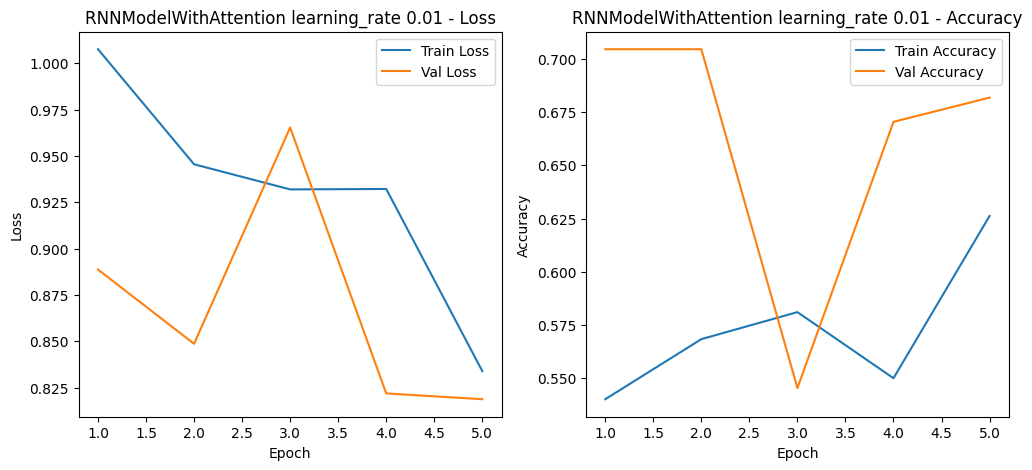

train_loss: [0.9742710201636605, 0.8917068113451418, 0.877449341442274, 0.8842159405998562, 0.8512000648871713]
val_loss: [0.9775927662849426, 0.9611839056015015, 0.9483682910601298, 0.962716281414032, 0.9807267189025879]
train_acc: [0.5655853314527504, 0.6262341325811002, 0.6262341325811002, 0.6262341325811002, 0.6304654442877292]
val_acc: [0.5681818181818182, 0.5681818181818182, 0.5681818181818182, 0.5681818181818182, 0.5681818181818182]


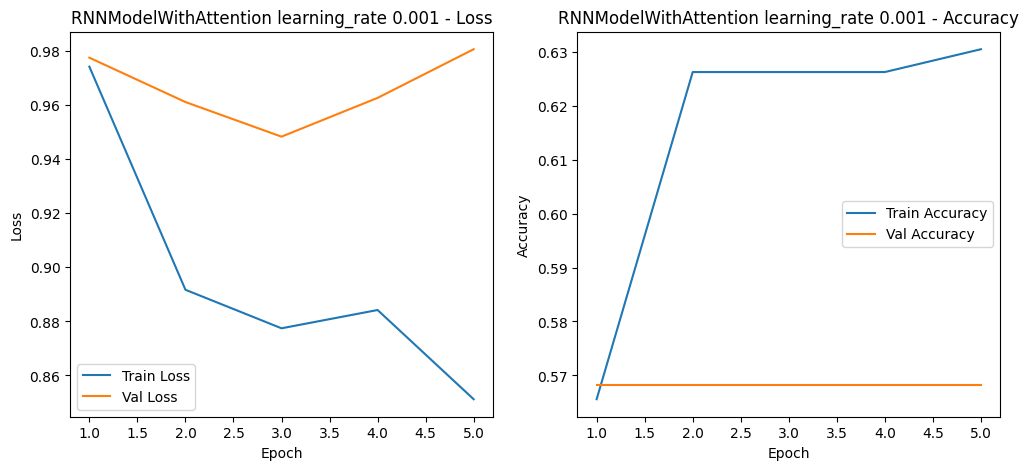

train_loss: [1.0882153822028118, 1.0126592205918354, 0.9669804573059082, 0.9516767600308293, 0.9463827376780303]
val_loss: [1.0363955895105998, 0.9697804053624471, 0.9314512213071188, 0.921522835890452, 0.9153002897898356]
train_acc: [0.3991537376586742, 0.5472496473906912, 0.5585331452750353, 0.5768688293370945, 0.5839210155148096]
val_acc: [0.5681818181818182, 0.5568181818181818, 0.5681818181818182, 0.5681818181818182, 0.5681818181818182]


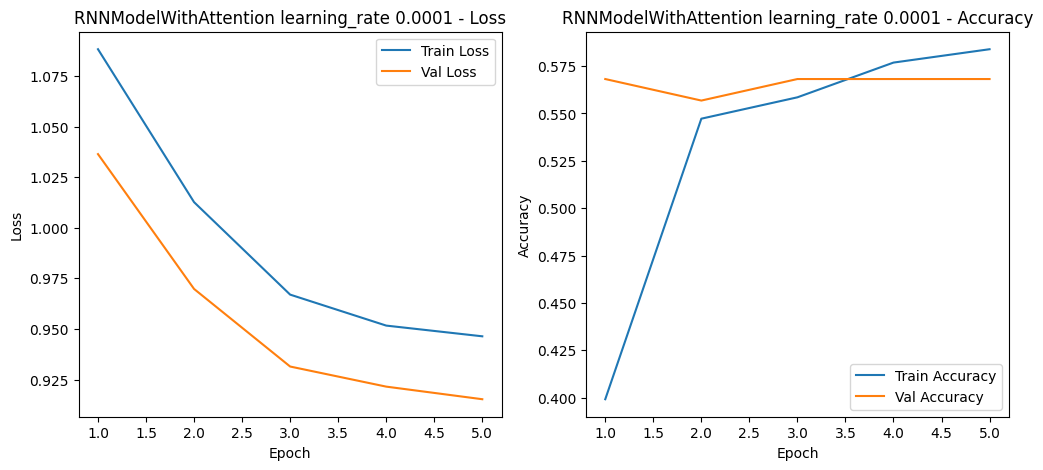

train_loss: [0.9647820773332015, 0.9376413381618002, 0.9163510799407959, 0.9210002966549086, 0.8967594970827517]
val_loss: [1.0625822345415752, 1.0300170183181763, 1.0236026247342427, 1.0144304434458415, 1.0052301088968914]
train_acc: [0.5401974612129761, 0.5853314527503526, 0.5825105782792666, 0.5740479548660085, 0.5923836389280677]
val_acc: [0.5681818181818182, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5568181818181818]


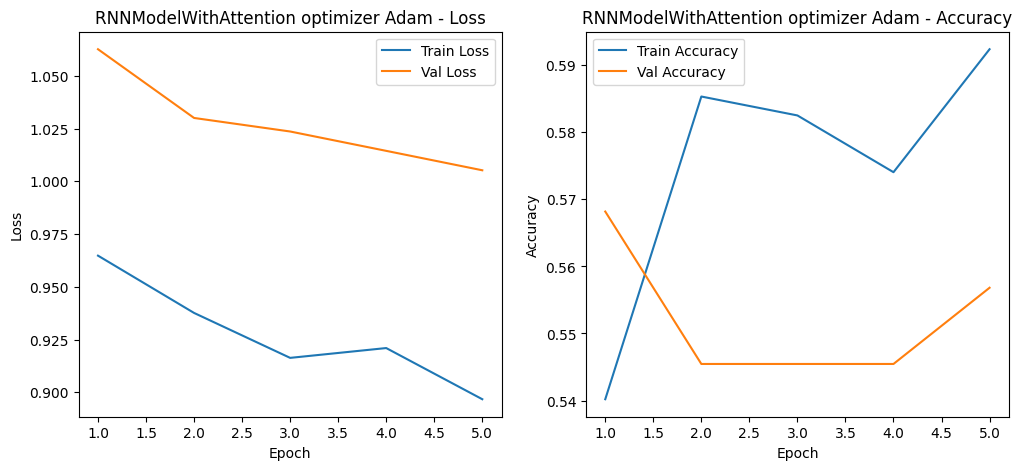

train_loss: [1.1114501849464749, 1.1106901894445005, 1.1103941357654075, 1.1088267720263938, 1.1068408281906792]
val_loss: [1.1119122505187988, 1.110483964284261, 1.1089452505111694, 1.107564091682434, 1.106349507967631]
train_acc: [0.25811001410437234, 0.25811001410437234, 0.25811001410437234, 0.25811001410437234, 0.25811001410437234]
val_acc: [0.2727272727272727, 0.2727272727272727, 0.2727272727272727, 0.2727272727272727, 0.2727272727272727]


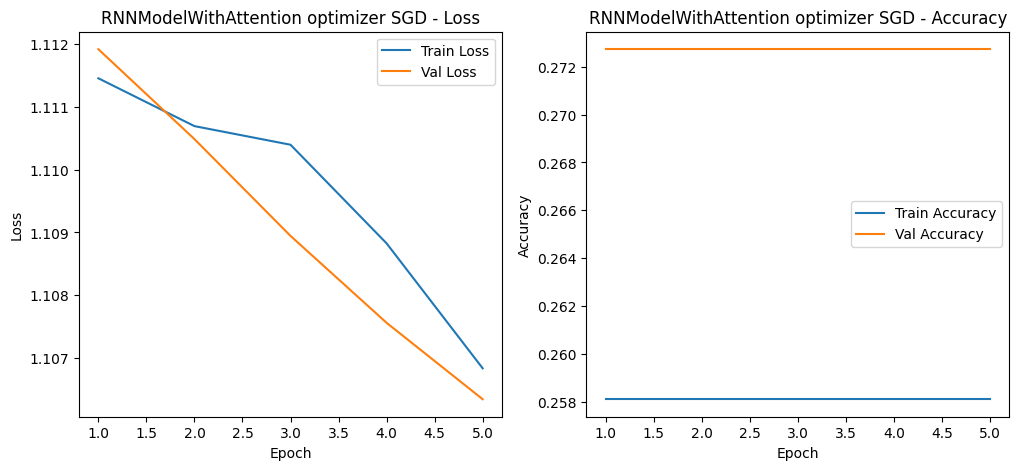

train_loss: [0.9841804115668588, 0.9291297171426856, 0.92991594646288, 0.9005823860997739, 0.9154974533163983]
val_loss: [0.9456325173377991, 0.9404210050900778, 0.9382928212483724, 0.9475933114687601, 0.9332177042961121]
train_acc: [0.5331452750352609, 0.5853314527503526, 0.5839210155148096, 0.5768688293370945, 0.5895627644569816]
val_acc: [0.5795454545454546, 0.5795454545454546, 0.5795454545454546, 0.5795454545454546, 0.5795454545454546]


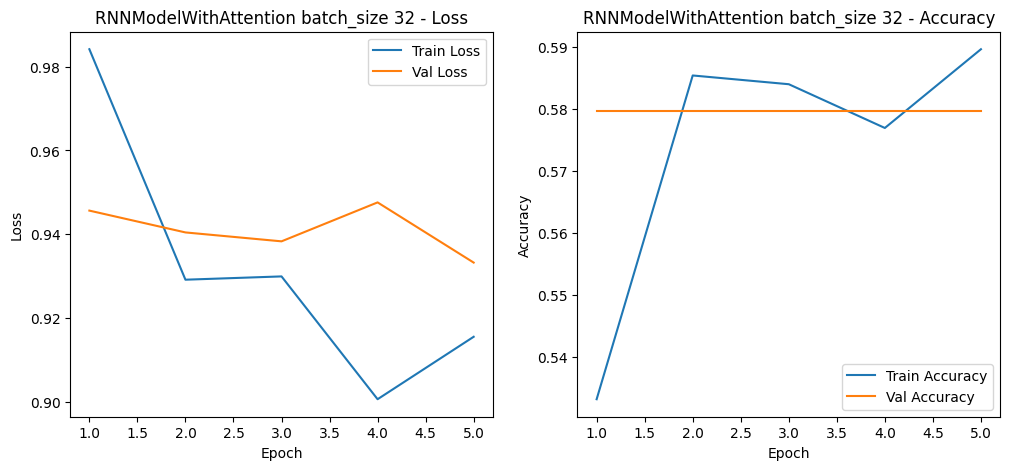

train_loss: [1.0198984642823536, 0.9351500670115153, 0.9455737372239431, 0.8937746087710062, 0.9007616539796194]
val_loss: [0.8390827775001526, 0.8493428528308868, 0.8392074108123779, 0.8479020893573761, 0.8373717367649078]
train_acc: [0.5500705218617772, 0.616361071932299, 0.616361071932299, 0.616361071932299, 0.616361071932299]
val_acc: [0.6704545454545454, 0.6704545454545454, 0.6704545454545454, 0.6704545454545454, 0.6704545454545454]


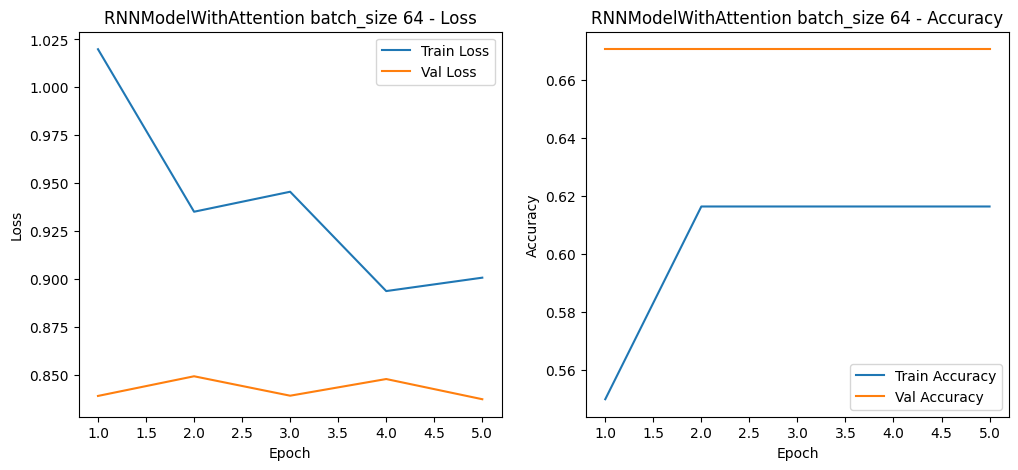

train_loss: [0.9837426569150842, 0.9244043516076129, 0.9457256146099257, 0.9060810130575429, 0.9041265119677004]
val_loss: [0.9528966148694357, 0.9460099538167318, 0.9414896766344706, 0.9365236759185791, 0.9533253908157349]
train_acc: [0.5585331452750353, 0.5839210155148096, 0.5796897038081805, 0.5923836389280677, 0.5923836389280677]
val_acc: [0.5795454545454546, 0.5681818181818182, 0.5795454545454546, 0.5795454545454546, 0.5795454545454546]


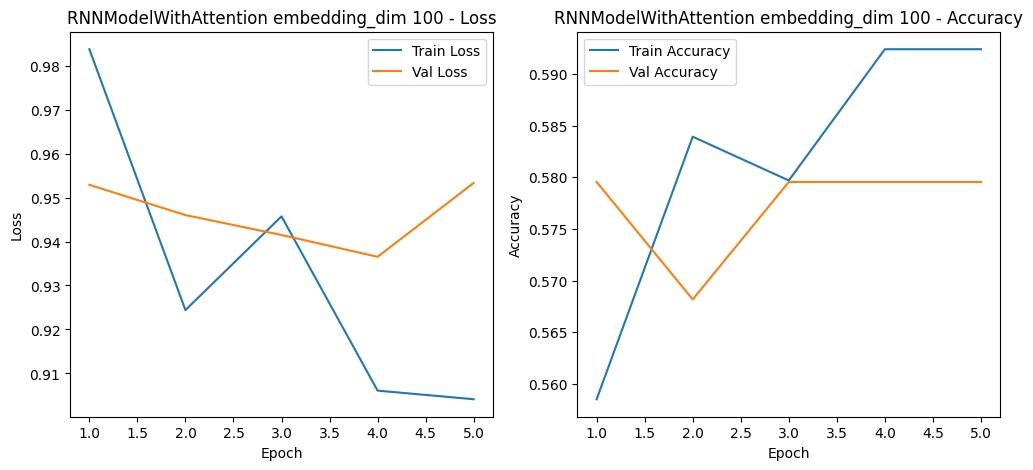

train_loss: [0.966019982876985, 0.9080909853396208, 0.9195578694343567, 0.9075503608454829, 0.8665021632028662]
val_loss: [0.9880699316660563, 0.958003302415212, 0.9802391131718954, 0.9378549059232076, 0.9610663056373596]
train_acc: [0.5669957686882934, 0.5923836389280677, 0.5994358251057827, 0.5994358251057827, 0.610719322990127]
val_acc: [0.5795454545454546, 0.5795454545454546, 0.5795454545454546, 0.5909090909090909, 0.5909090909090909]


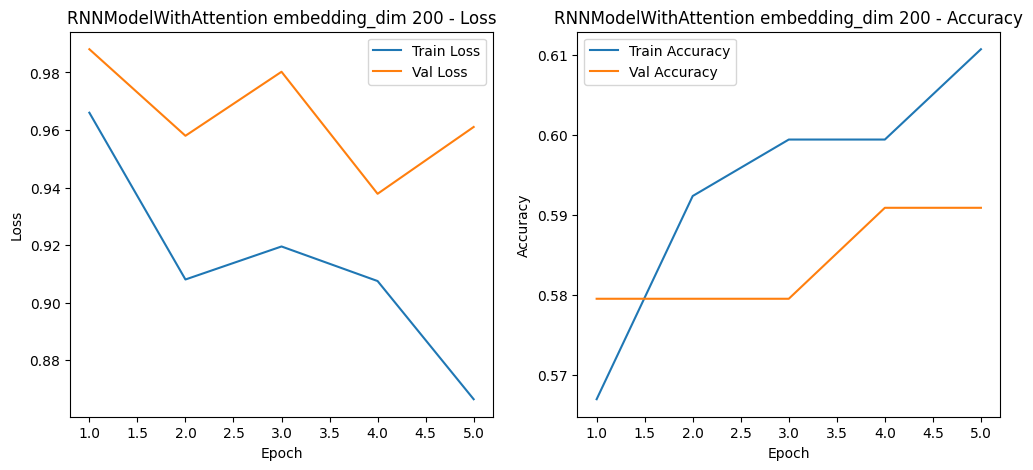

train_loss: [0.9433716535568237, 0.8812875851340916, 0.862576434145803, 0.8542899074761764, 0.7960986831913823]
val_loss: [0.902910033861796, 0.8965585231781006, 0.895153820514679, 0.9198989669481913, 0.9789153337478638]
train_acc: [0.5839210155148096, 0.6332863187588152, 0.6389280677009873, 0.6389280677009873, 0.6629055007052186]
val_acc: [0.625, 0.5795454545454546, 0.625, 0.6363636363636364, 0.5909090909090909]


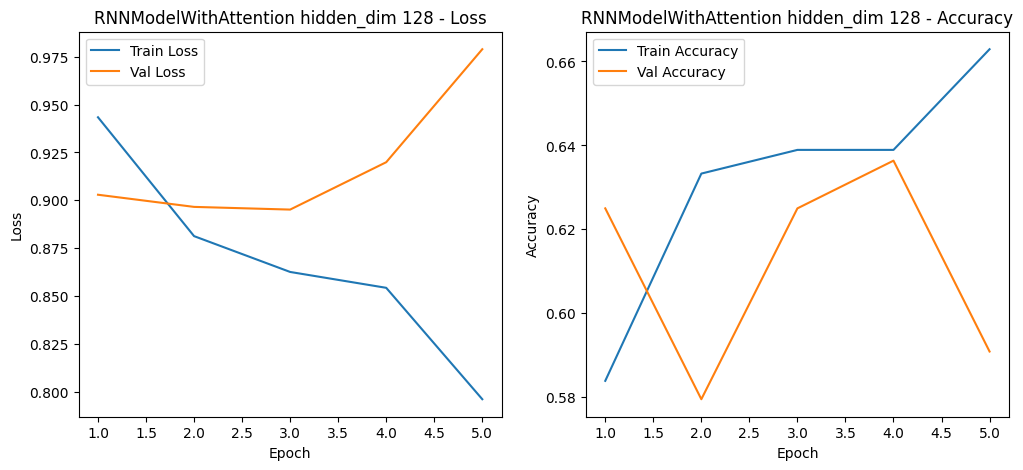

train_loss: [1.000896427942359, 0.953375342099563, 0.941937936388928, 0.9370887098105057, 0.8796177584192028]
val_loss: [0.9272138873736063, 0.9362137715021769, 0.9610885183016459, 0.946707010269165, 1.3321646451950073]
train_acc: [0.4710860366713681, 0.5571227080394923, 0.5416078984485191, 0.5698166431593794, 0.5980253878702397]
val_acc: [0.5909090909090909, 0.625, 0.6022727272727273, 0.5795454545454546, 0.5]


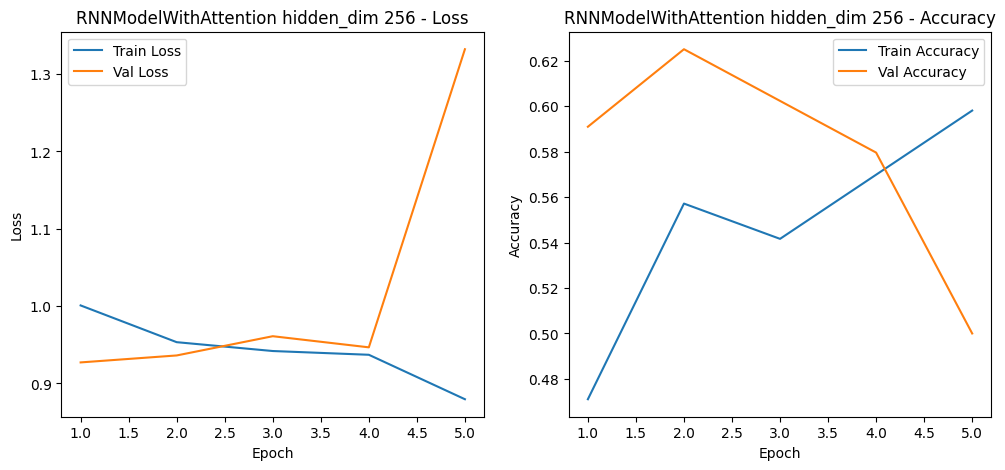

train_loss: [0.9788164418676625, 0.9234099388122559, 0.8860953864843949, 0.9036735451739767, 0.87409668383391]
val_loss: [0.8456825017929077, 0.8810969789822897, 0.8857890168825785, 0.8762772083282471, 0.8677825729052225]
train_acc: [0.5585331452750353, 0.6205923836389281, 0.6191819464033851, 0.6248236953455572, 0.6220028208744711]
val_acc: [0.6477272727272727, 0.6590909090909091, 0.6590909090909091, 0.6590909090909091, 0.6590909090909091]


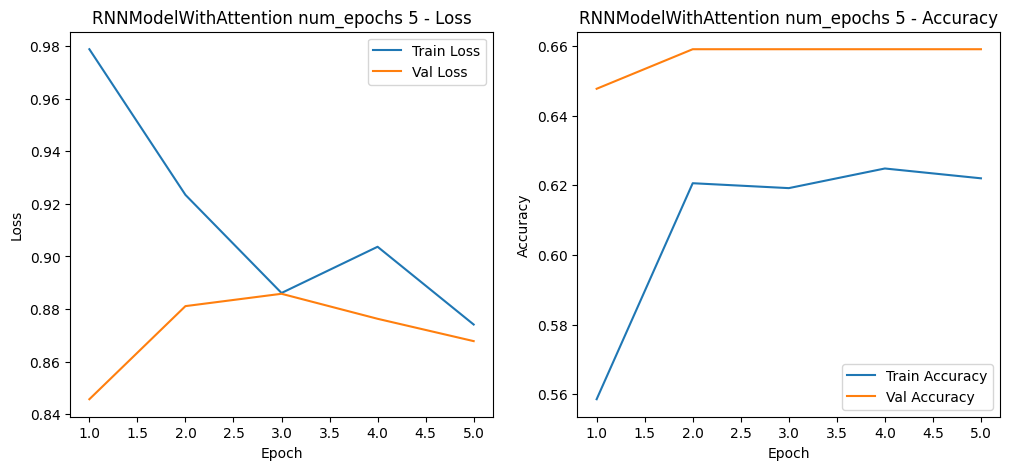

train_loss: [0.9692981476369111, 0.9340504718863446, 0.9308323082716569, 0.9188946226368779, 0.9131023365518321, 0.8995144755943961, 0.908358053020809, 0.8359646071558413, 0.7544255619463713, 0.6904700424360193]
val_loss: [0.9657380183537801, 0.9502171476682028, 0.9589987397193909, 0.9608230193456014, 0.9462081591288248, 0.9269325931866964, 0.9299900730450948, 0.9143194158871969, 1.003842055797577, 1.1414657632509868]
train_acc: [0.5528913963328632, 0.5952045133991537, 0.5923836389280677, 0.5952045133991537, 0.5952045133991537, 0.6036671368124118, 0.5698166431593794, 0.6276445698166432, 0.6741889985895627, 0.7165021156558533]
val_acc: [0.6136363636363636, 0.6136363636363636, 0.6136363636363636, 0.6136363636363636, 0.6136363636363636, 0.625, 0.6136363636363636, 0.6136363636363636, 0.5795454545454546, 0.5340909090909091]


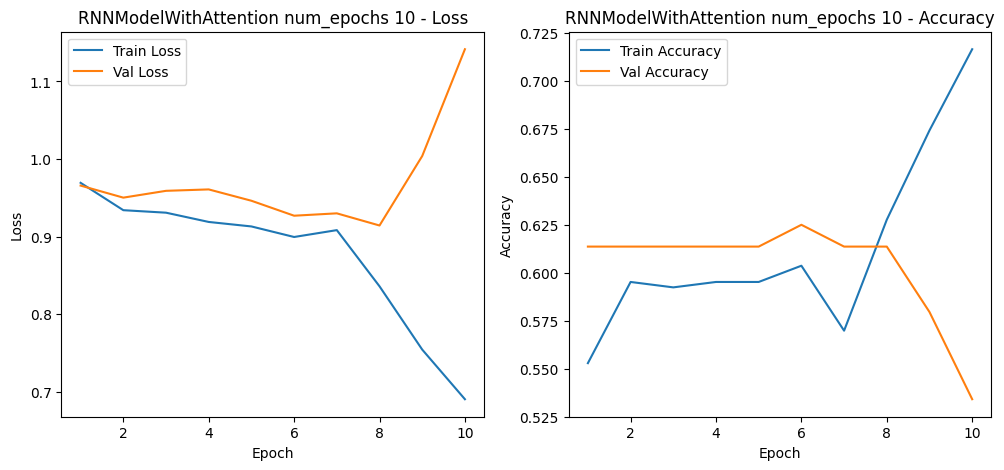

train_loss: [0.9543187385020049, 0.8943156755488851, 0.8945320144943569, 0.89638308338497, 0.8925579475319904]
val_loss: [0.9240734775861105, 0.9148574471473694, 0.9060749212900797, 0.9034016132354736, 0.8963061769803365]
train_acc: [0.5881523272214386, 0.6191819464033851, 0.616361071932299, 0.6205923836389281, 0.6177715091678421]
val_acc: [0.625, 0.6136363636363636, 0.625, 0.625, 0.625]


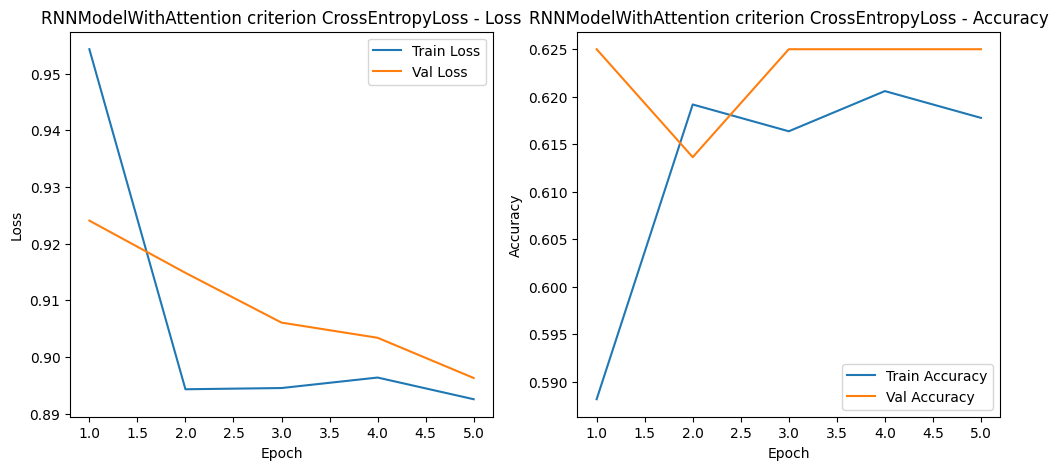

train_loss: [0.9704752305279607, 0.9185417242672133, 0.9025094249974126, 0.8917314591615096, 0.9153184320615686]
val_loss: [0.8943474094072977, 0.8955749869346619, 0.904613196849823, 0.8841385642687479, 0.902876098950704]
train_acc: [0.5641748942172073, 0.61212976022567, 0.610719322990127, 0.616361071932299, 0.616361071932299]
val_acc: [0.6022727272727273, 0.6136363636363636, 0.6022727272727273, 0.6022727272727273, 0.6022727272727273]


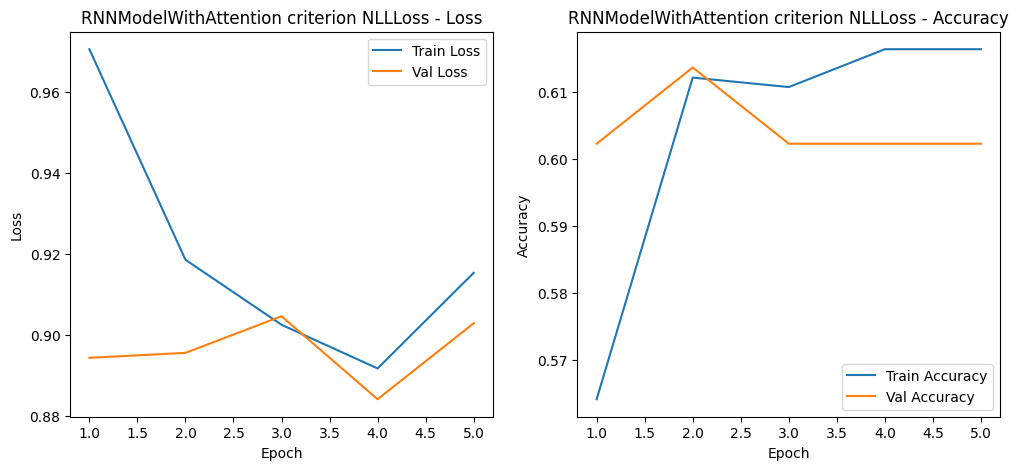

train_loss: [1.038535556067591, 0.9815712726634481, 0.9672298664632051, 0.9660793750182443, 0.9433701090190721]
val_loss: [0.9613557656606039, 0.9582131107648214, 0.9511211514472961, 0.935874859491984, 0.9299407800038656]
train_acc: [0.4837799717912553, 0.5641748942172073, 0.5768688293370945, 0.5641748942172073, 0.5768688293370945]
val_acc: [0.5795454545454546, 0.5681818181818182, 0.5681818181818182, 0.5681818181818182, 0.5681818181818182]


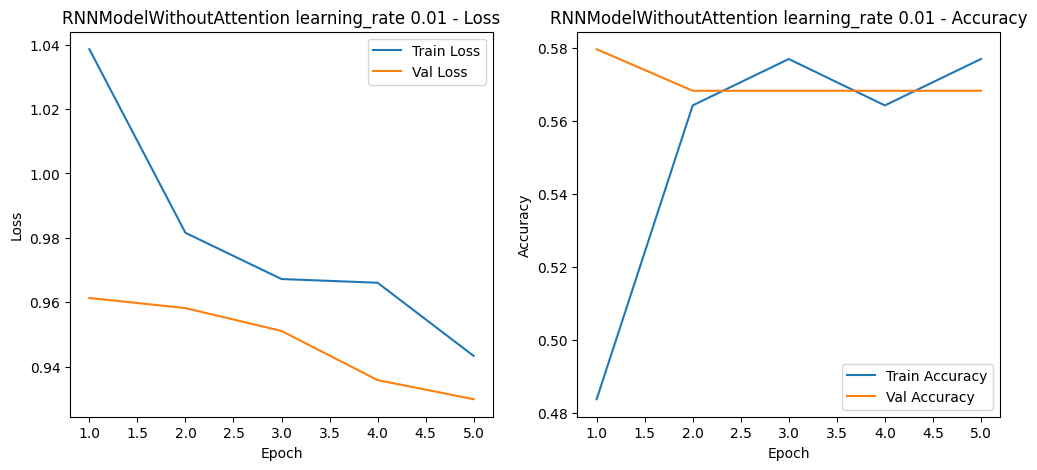

train_loss: [0.996813556422358, 0.9411631641180619, 0.9345972278843755, 0.9429165409958881, 0.9168923549030138]
val_loss: [0.9447300036748251, 0.9039713342984518, 0.9178017973899841, 0.9084309538205465, 0.9079341093699137]
train_acc: [0.5500705218617772, 0.5260930888575458, 0.5627644569816643, 0.5669957686882934, 0.5655853314527504]
val_acc: [0.5795454545454546, 0.5795454545454546, 0.6022727272727273, 0.5795454545454546, 0.6022727272727273]


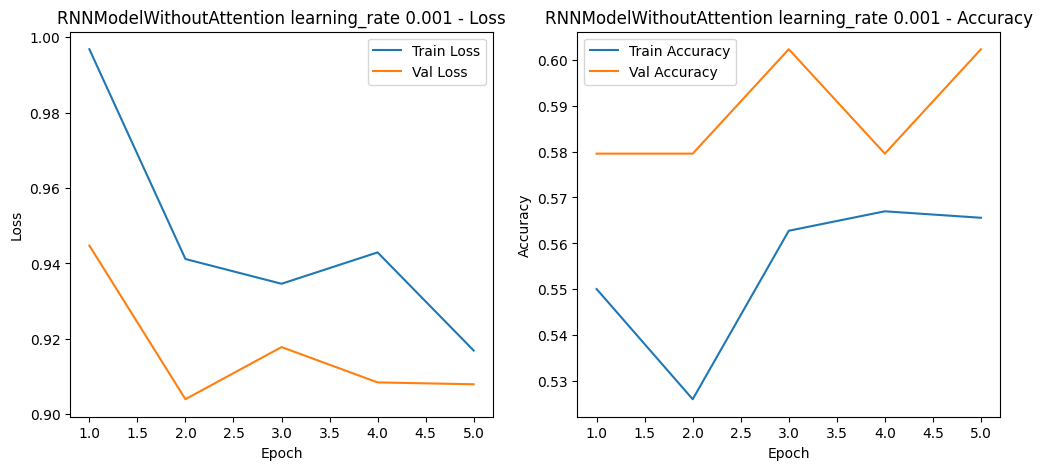

train_loss: [1.072841711666273, 1.0061221874278525, 0.9335972459419913, 0.8843998261120009, 0.8815664389859075]
val_loss: [1.052128831545512, 0.9833939075469971, 0.9334971110026041, 0.9229235251744589, 0.9204907615979513]
train_acc: [0.48660084626234135, 0.6008462623413258, 0.6064880112834978, 0.609308885754584, 0.6022566995768688]
val_acc: [0.5795454545454546, 0.5795454545454546, 0.5909090909090909, 0.5909090909090909, 0.5909090909090909]


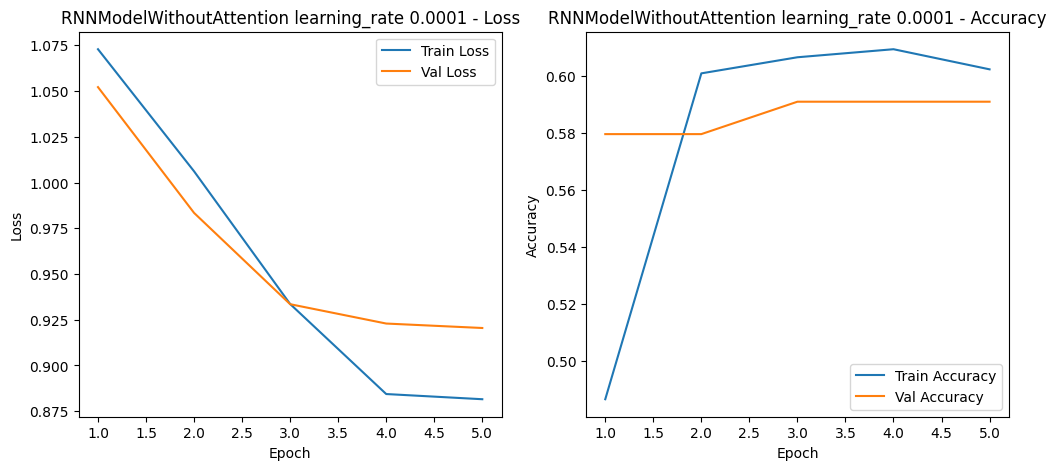

train_loss: [0.9857974052429199, 0.9389974785887677, 0.9480972523274629, 0.9331561897111975, 0.9322223922480708]
val_loss: [0.884251872698466, 0.9004155397415161, 0.8772294521331787, 0.8964439034461975, 0.8856386144955953]
train_acc: [0.5345557122708039, 0.5641748942172073, 0.5669957686882934, 0.5740479548660085, 0.5726375176304654]
val_acc: [0.6022727272727273, 0.625, 0.625, 0.6022727272727273, 0.6022727272727273]


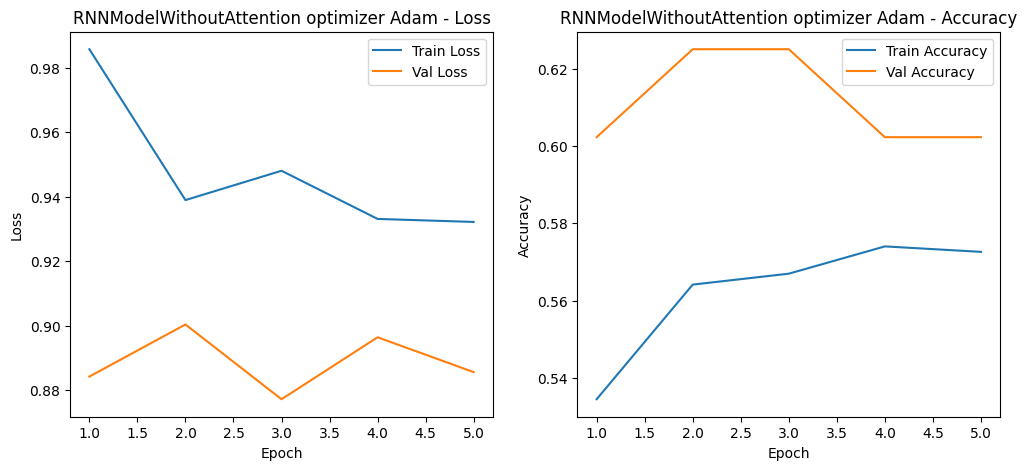

train_loss: [1.104305915210558, 1.1023039195848547, 1.1018757301828135, 1.1004352258599324, 1.0978616268738457]
val_loss: [1.1085329055786133, 1.105757196744283, 1.1029982169469197, 1.1002131700515747, 1.0973159472147624]
train_acc: [0.2143864598025388, 0.2143864598025388, 0.2143864598025388, 0.2143864598025388, 0.2143864598025388]
val_acc: [0.17045454545454544, 0.17045454545454544, 0.17045454545454544, 0.17045454545454544, 0.17045454545454544]


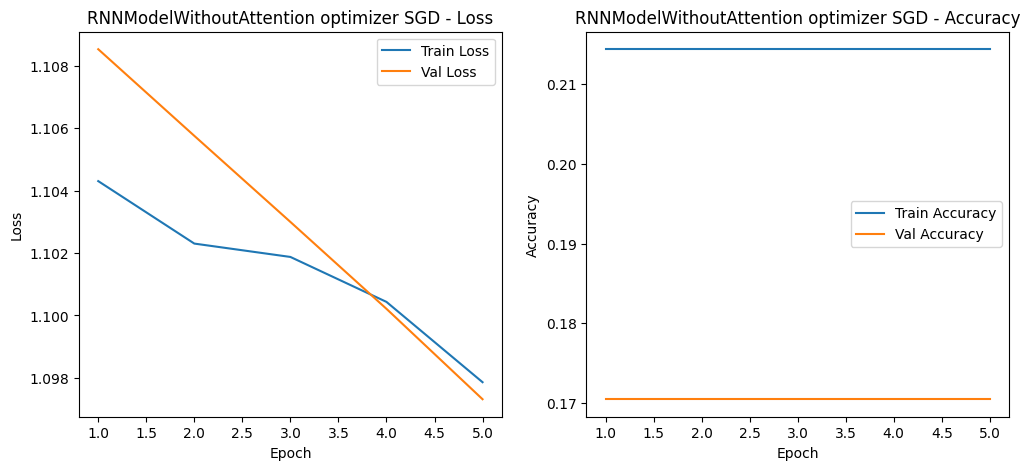

train_loss: [0.9507846987765768, 0.9019731464593307, 0.8969169595967168, 0.8824864755506101, 0.8761584162712097]
val_loss: [0.9375549554824829, 0.9520069559415182, 0.934003492196401, 0.9316821297009786, 0.9391669432322184]
train_acc: [0.5754583921015515, 0.5937940761636107, 0.5712270803949224, 0.6008462623413258, 0.5980253878702397]
val_acc: [0.6022727272727273, 0.5681818181818182, 0.6022727272727273, 0.6022727272727273, 0.6022727272727273]


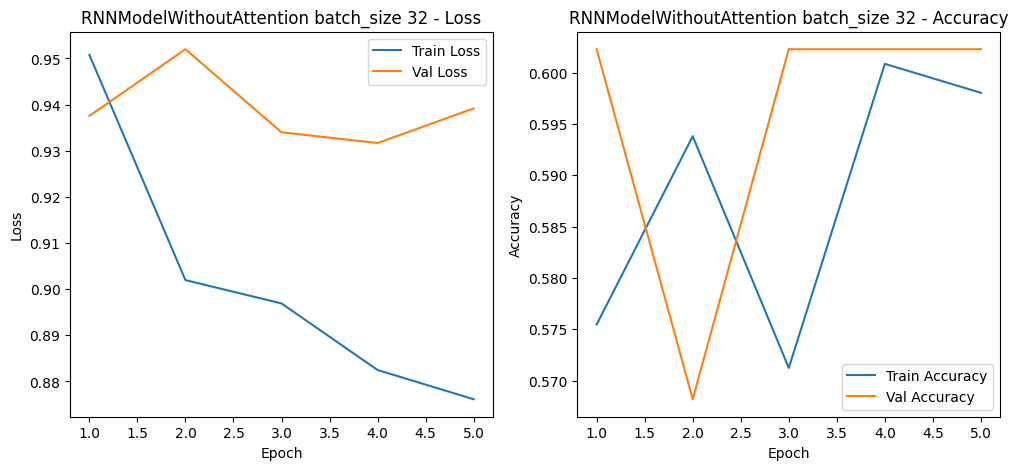

train_loss: [0.9480624347925186, 0.9214206337928772, 0.9309625575939814, 0.9231032431125641, 0.8887598911921183]
val_loss: [0.980124294757843, 0.9486876130104065, 0.9448253214359283, 0.9347768127918243, 0.9410778880119324]
train_acc: [0.5246826516220028, 0.6022566995768688, 0.6064880112834978, 0.6064880112834978, 0.6064880112834978]
val_acc: [0.5568181818181818, 0.5568181818181818, 0.5568181818181818, 0.5568181818181818, 0.5568181818181818]


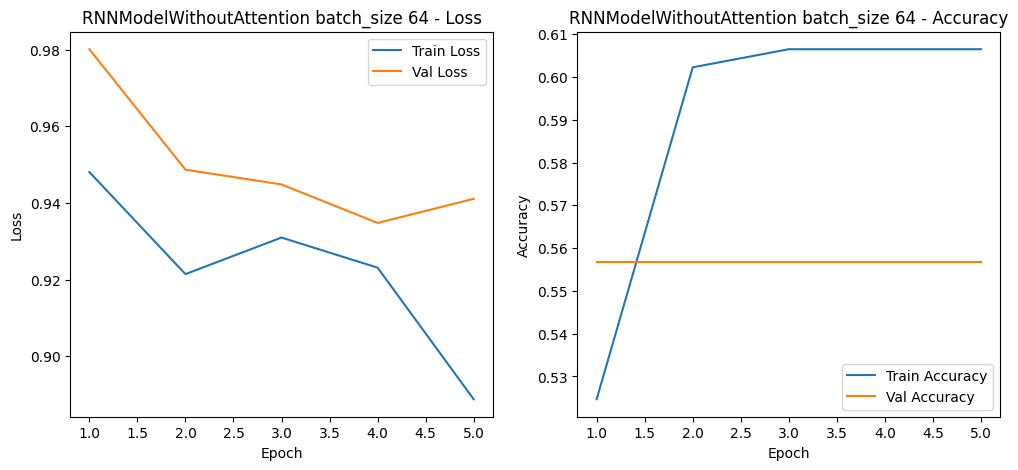

train_loss: [0.9891921178154324, 0.9393964047017305, 0.9400497804517332, 0.9444696695908256, 0.9254902938137883]
val_loss: [0.9158827463785807, 0.9000426332155863, 0.9142659703890482, 0.9065683682759603, 0.9127956827481588]
train_acc: [0.5232722143864598, 0.5684062059238364, 0.5669957686882934, 0.5768688293370945, 0.5768688293370945]
val_acc: [0.6022727272727273, 0.6022727272727273, 0.6022727272727273, 0.6022727272727273, 0.6022727272727273]


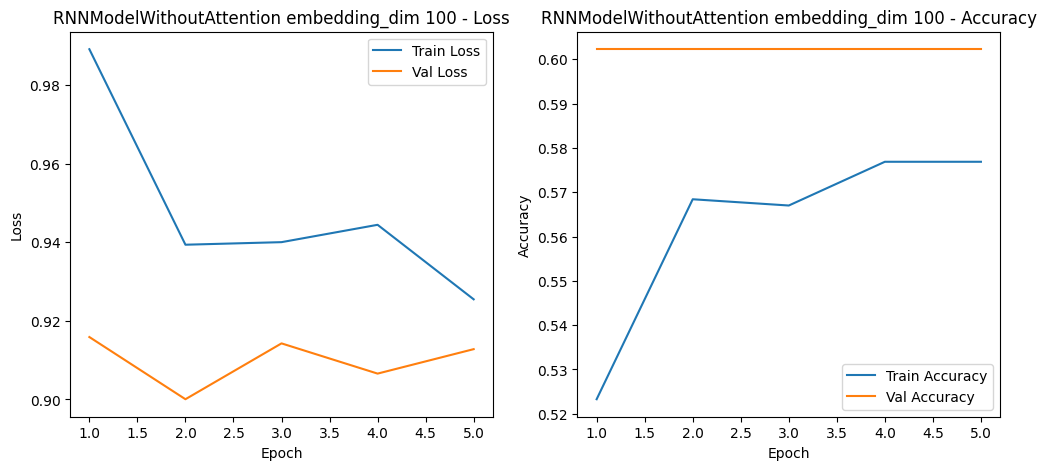

train_loss: [0.9514187911282415, 0.9099790557571079, 0.8973606151083241, 0.8988489871439727, 0.9026091876237289]
val_loss: [0.9641427397727966, 0.9850969115893046, 0.9651051561037699, 0.9638907512029012, 0.9582189122835795]
train_acc: [0.5599435825105783, 0.6064880112834978, 0.614950634696756, 0.614950634696756, 0.614950634696756]
val_acc: [0.5681818181818182, 0.5681818181818182, 0.5681818181818182, 0.5681818181818182, 0.5681818181818182]


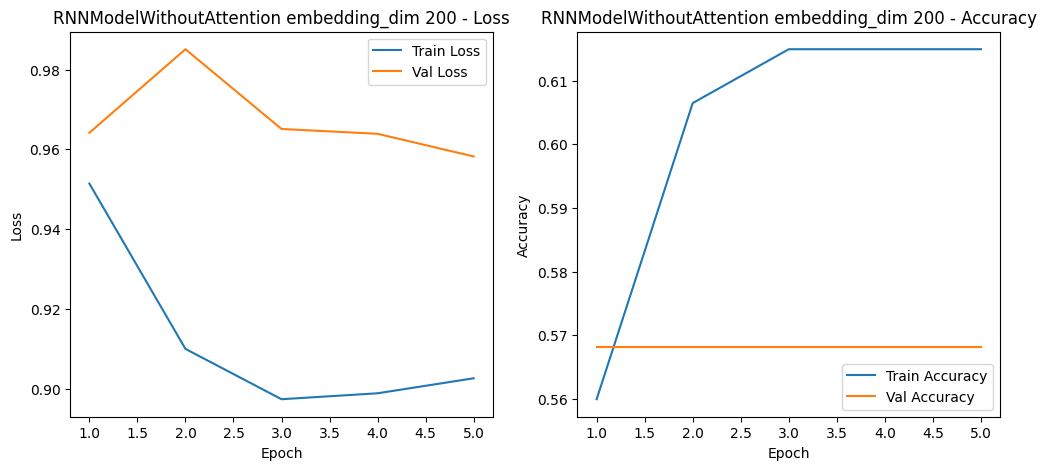

train_loss: [0.9943013890929844, 0.9598002718842548, 0.9438342218813689, 0.9264609580454619, 0.9362137706383414]
val_loss: [0.910448948542277, 0.9402819275856018, 0.9162635008494059, 0.9332400361696879, 0.9246432582537333]
train_acc: [0.5514809590973202, 0.5923836389280677, 0.5923836389280677, 0.5923836389280677, 0.5867418899858956]
val_acc: [0.6136363636363636, 0.6136363636363636, 0.6136363636363636, 0.6136363636363636, 0.6136363636363636]


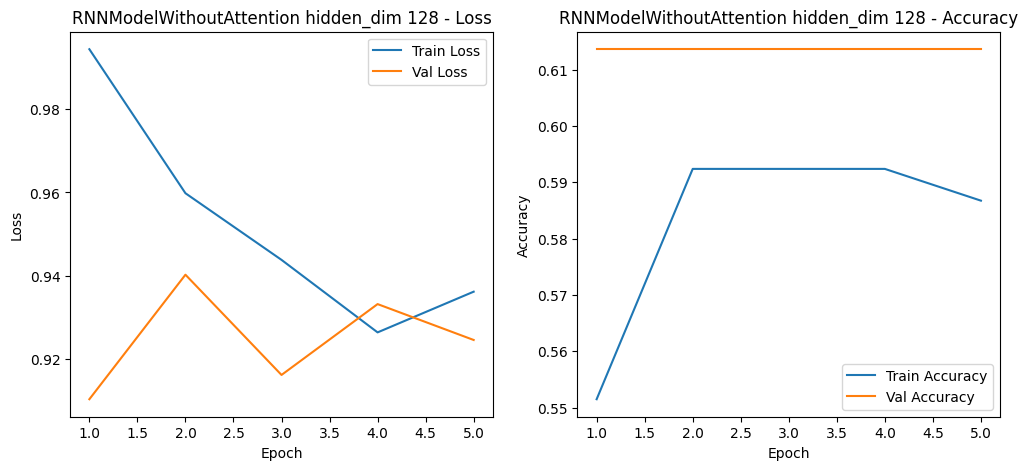

train_loss: [0.952273788659469, 0.904164837754291, 0.9219320960666822, 0.9117190863775171, 0.9085176535274672]
val_loss: [0.9590835571289062, 1.005940854549408, 0.9816859761873881, 1.0146892269452412, 1.0308112700780232]
train_acc: [0.5641748942172073, 0.5952045133991537, 0.5980253878702397, 0.6022566995768688, 0.5895627644569816]
val_acc: [0.5681818181818182, 0.4772727272727273, 0.5, 0.5113636363636364, 0.5113636363636364]


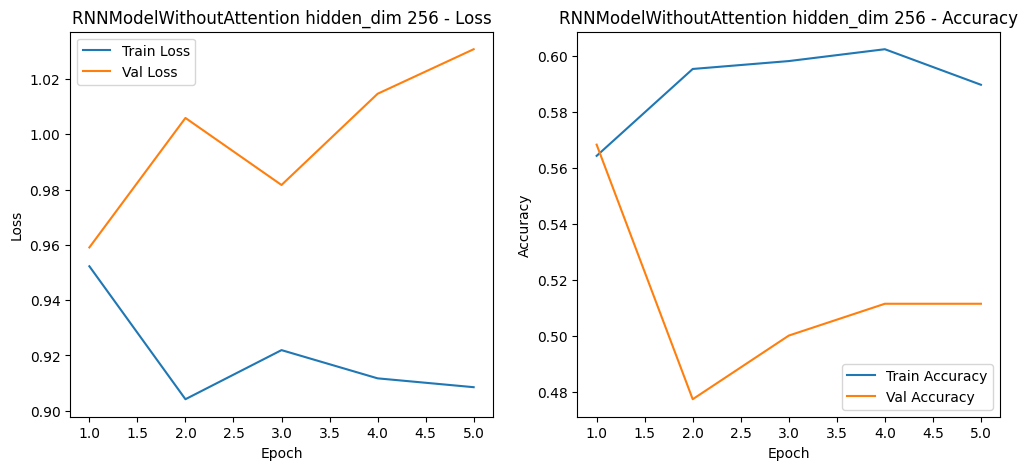

train_loss: [0.9787699735682943, 0.9165425948474718, 0.9298966786135798, 0.9357216513675192, 0.9093088870463164]
val_loss: [0.9994492928187052, 0.9820853273073832, 0.9915184577306112, 0.9916543364524841, 0.9728918472925822]
train_acc: [0.5754583921015515, 0.6022566995768688, 0.6036671368124118, 0.6050775740479548, 0.6050775740479548]
val_acc: [0.5454545454545454, 0.5681818181818182, 0.5681818181818182, 0.5681818181818182, 0.5681818181818182]


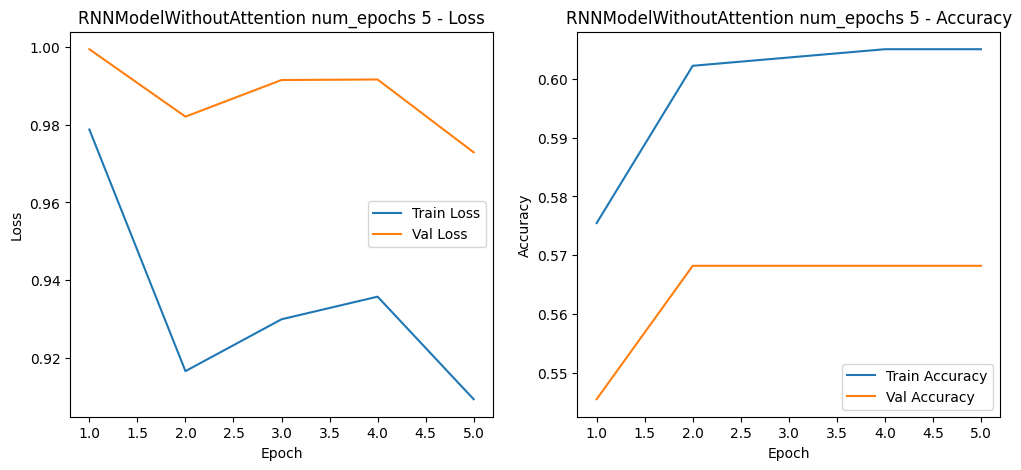

train_loss: [0.9705262028652689, 0.9358367634856183, 0.9233767442081285, 0.9040742464687513, 0.8993945355000703, 0.9197342629018037, 0.9133123418559199, 0.916426974794139, 0.9124640355939451, 0.9008841436842213]
val_loss: [0.9384125471115112, 0.911778966585795, 0.9277661641438802, 0.9198099772135416, 0.9000474214553833, 0.8998225132624308, 0.8988965153694153, 0.9048901995023092, 0.8905822436014811, 0.9159944852193197]
train_acc: [0.5543018335684062, 0.5994358251057827, 0.5909732016925247, 0.5994358251057827, 0.5994358251057827, 0.5994358251057827, 0.5994358251057827, 0.5994358251057827, 0.5994358251057827, 0.5994358251057827]
val_acc: [0.6022727272727273, 0.6022727272727273, 0.6022727272727273, 0.6022727272727273, 0.6022727272727273, 0.6022727272727273, 0.6022727272727273, 0.6022727272727273, 0.6022727272727273, 0.6022727272727273]


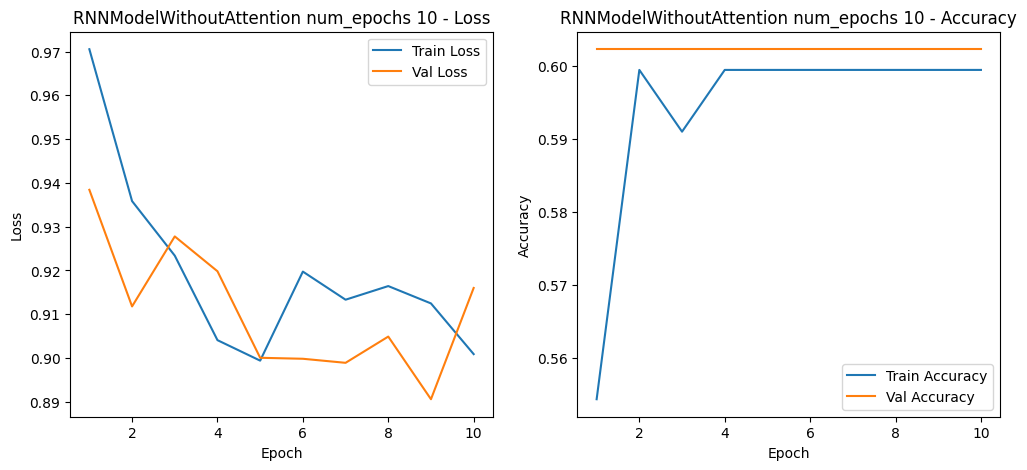

train_loss: [1.0057787428731504, 0.9431261135184247, 0.9233827642772509, 0.9286261434140413, 0.9311772066613903]
val_loss: [0.8951247533162435, 0.909096896648407, 0.9095880587895712, 0.9045315583546957, 0.9005673130353292]
train_acc: [0.5430183356840621, 0.5923836389280677, 0.5867418899858956, 0.5923836389280677, 0.5923836389280677]
val_acc: [0.6136363636363636, 0.6136363636363636, 0.6136363636363636, 0.6136363636363636, 0.6136363636363636]


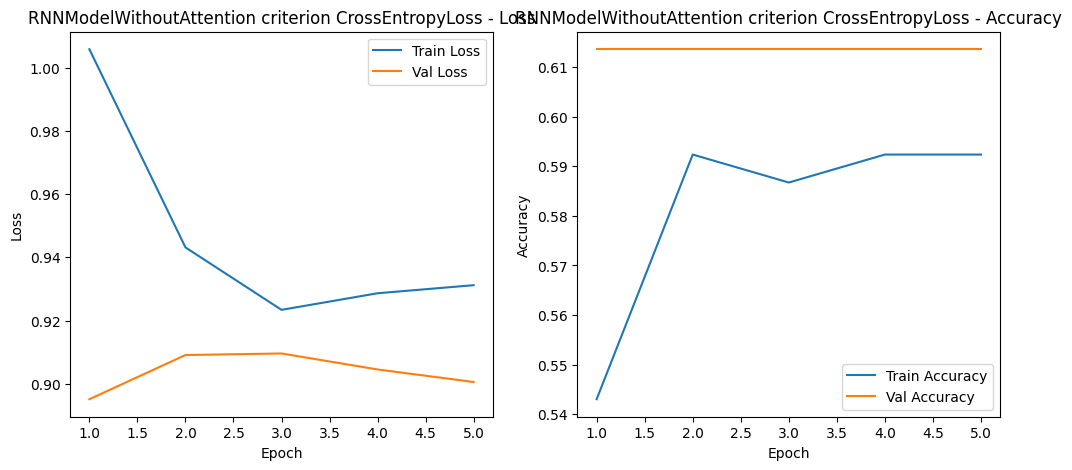

train_loss: [0.9714344791744066, 0.9272730998370958, 0.9312212104382722, 0.92909683611082, 0.9302886698556982]
val_loss: [0.8734970688819885, 0.8484785556793213, 0.8379375537236532, 0.8354392250378927, 0.8511500954627991]
train_acc: [0.5740479548660085, 0.5994358251057827, 0.6008462623413258, 0.6008462623413258, 0.6008462623413258]
val_acc: [0.6477272727272727, 0.6590909090909091, 0.6590909090909091, 0.6590909090909091, 0.6590909090909091]


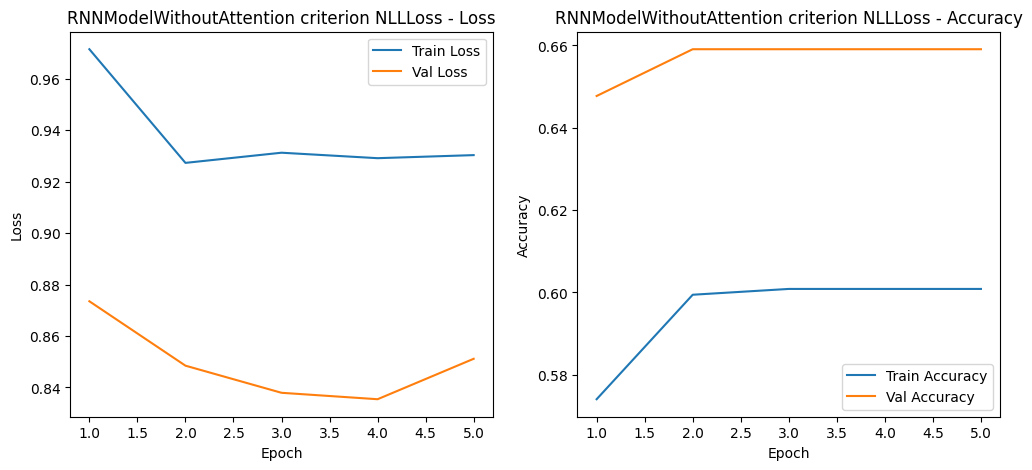

train_loss: [0.9946188097414763, 0.960738454176032, 0.9754591687865879, 0.9496217940164648, 0.9304306740346162]
val_loss: [1.0776345531145732, 1.0263190666834514, 1.057302455107371, 0.989544153213501, 1.0458254218101501]
train_acc: [0.5585331452750353, 0.5796897038081805, 0.5909732016925247, 0.5952045133991537, 0.6022566995768688]
val_acc: [0.5113636363636364, 0.5227272727272727, 0.5227272727272727, 0.5227272727272727, 0.5227272727272727]


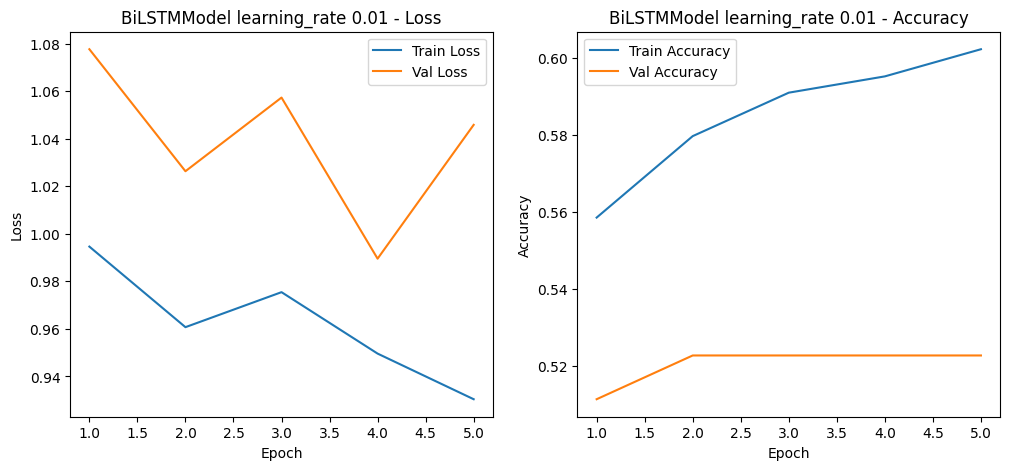

train_loss: [0.9627201479414235, 0.8794987227605737, 0.9017447129539822, 0.9073989417241968, 0.882608817971271]
val_loss: [0.8328942855199178, 0.8105885783831278, 0.800257941087087, 0.7961345911026001, 0.8073585629463196]
train_acc: [0.5825105782792666, 0.6248236953455572, 0.6248236953455572, 0.6248236953455572, 0.6318758815232722]
val_acc: [0.6363636363636364, 0.6363636363636364, 0.6363636363636364, 0.6363636363636364, 0.6363636363636364]


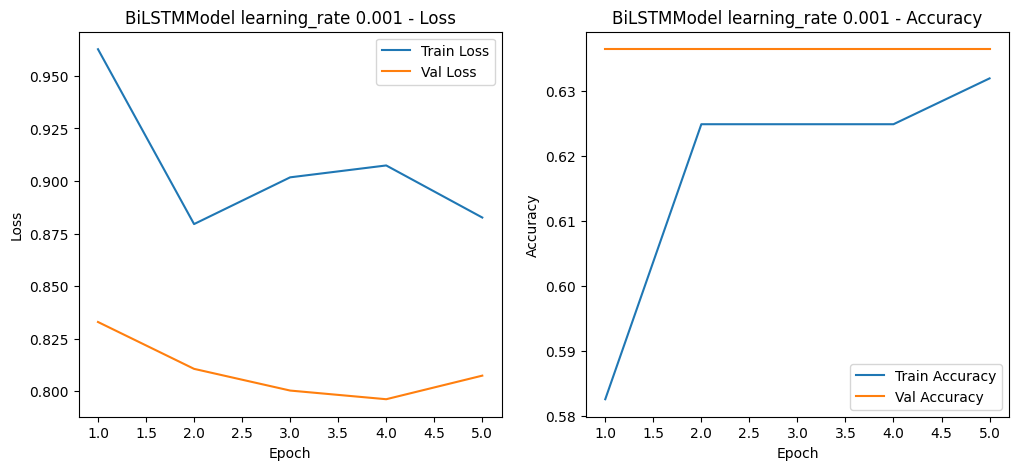

train_loss: [1.058095377424489, 0.9627534176992334, 0.9354079132494719, 0.9317559237065522, 0.9171445939851843]
val_loss: [1.0289742350578308, 0.9710166255633036, 0.943189819653829, 0.9351605375607809, 0.9232569336891174]
train_acc: [0.5176304654442877, 0.5980253878702397, 0.5980253878702397, 0.5980253878702397, 0.5980253878702397]
val_acc: [0.5568181818181818, 0.5568181818181818, 0.5568181818181818, 0.5568181818181818, 0.5568181818181818]


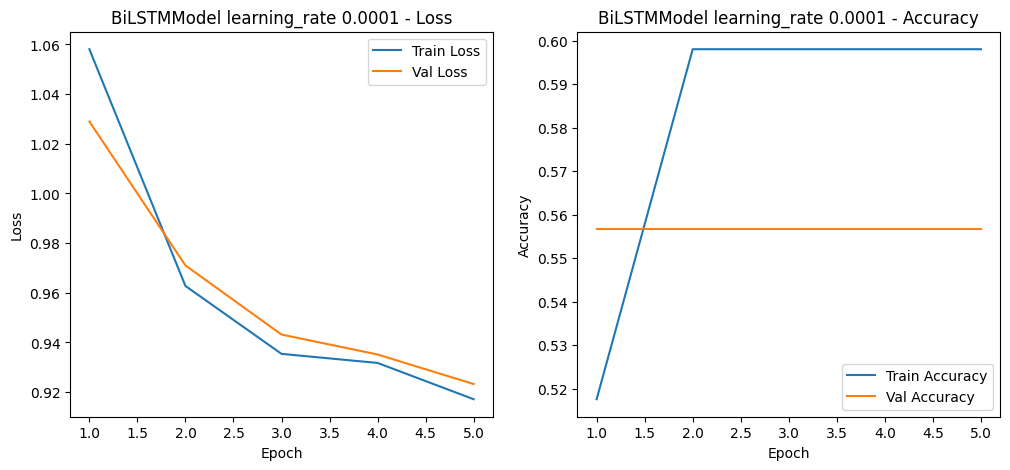

train_loss: [0.9749117856440337, 0.9260955323343691, 0.9250182716742806, 0.9185018306193145, 0.9183334060337233]
val_loss: [0.9539446234703064, 0.9150204062461853, 0.9256371458371481, 0.9231657981872559, 0.9175847172737122]
train_acc: [0.5246826516220028, 0.5825105782792666, 0.5937940761636107, 0.5937940761636107, 0.5937940761636107]
val_acc: [0.6363636363636364, 0.6590909090909091, 0.6590909090909091, 0.6590909090909091, 0.6590909090909091]


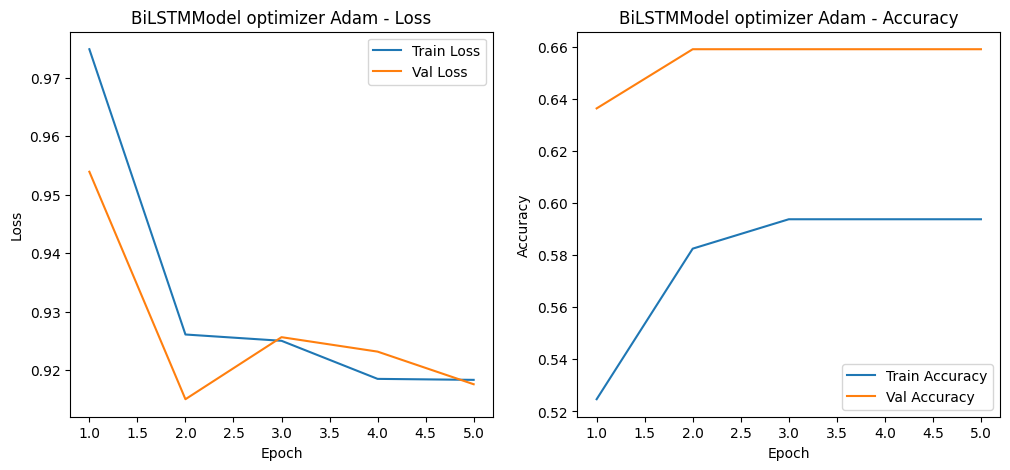

train_loss: [1.091468940610471, 1.088665801545848, 1.0881823353145434, 1.0852740277414736, 1.0829290618067202]
val_loss: [1.0891561110814412, 1.0854545036951702, 1.0824663241704304, 1.0794556140899658, 1.0761486689249675]
train_acc: [0.46544428772919605, 0.5486600846262342, 0.5740479548660085, 0.5740479548660085, 0.5726375176304654]
val_acc: [0.5113636363636364, 0.6931818181818182, 0.6931818181818182, 0.6931818181818182, 0.6704545454545454]


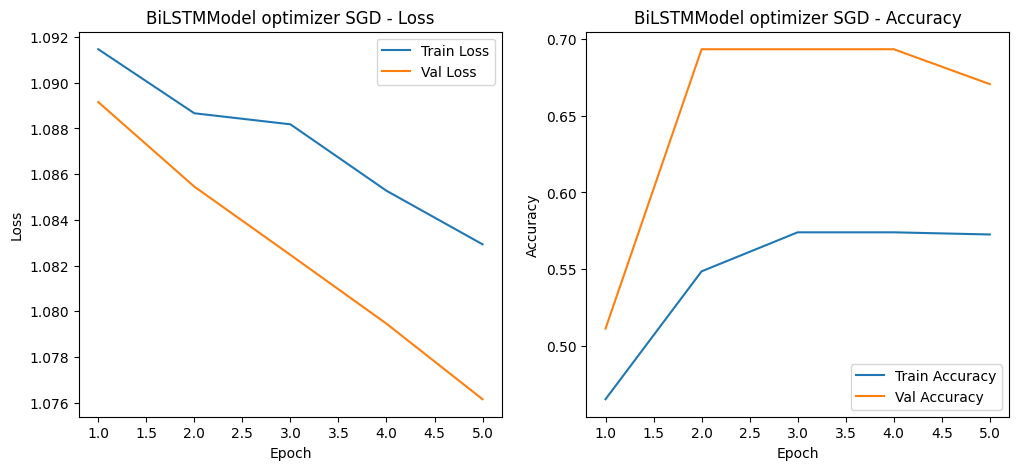

train_loss: [0.9904113982034766, 0.9831036070118779, 0.9799082408780637, 0.9495536166688671, 0.9401862932288129]
val_loss: [0.9630692601203918, 0.9746291637420654, 0.9737944602966309, 0.9670127034187317, 0.9717763264973959]
train_acc: [0.5486600846262342, 0.5684062059238364, 0.5655853314527504, 0.5740479548660085, 0.5754583921015515]
val_acc: [0.5340909090909091, 0.5340909090909091, 0.5340909090909091, 0.5340909090909091, 0.5340909090909091]


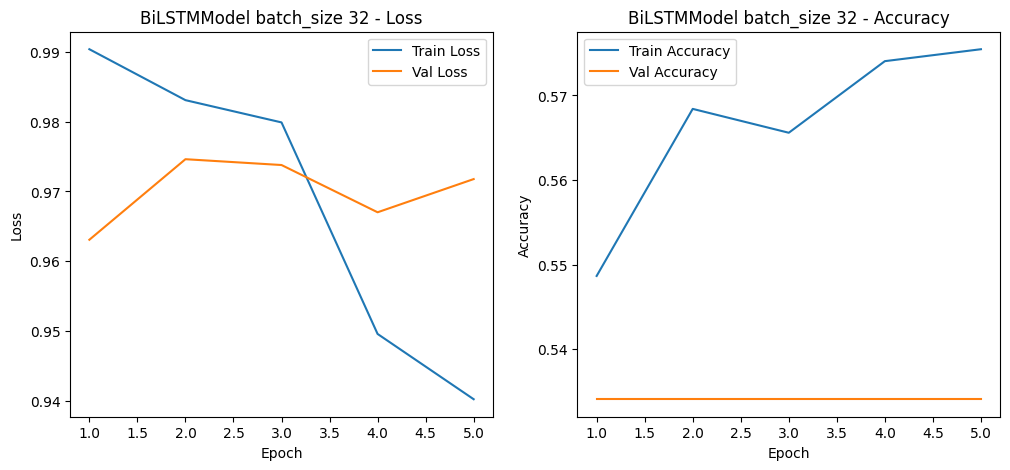

train_loss: [0.9698380827903748, 0.9850366363922755, 0.9480869571367899, 0.9527111748854319, 0.9343113650878271]
val_loss: [0.8850609958171844, 0.8804421126842499, 0.8774657547473907, 0.8372300267219543, 0.8942619860172272]
train_acc: [0.5289139633286318, 0.5599435825105783, 0.5712270803949224, 0.5712270803949224, 0.5698166431593794]
val_acc: [0.625, 0.6477272727272727, 0.6590909090909091, 0.6590909090909091, 0.6477272727272727]


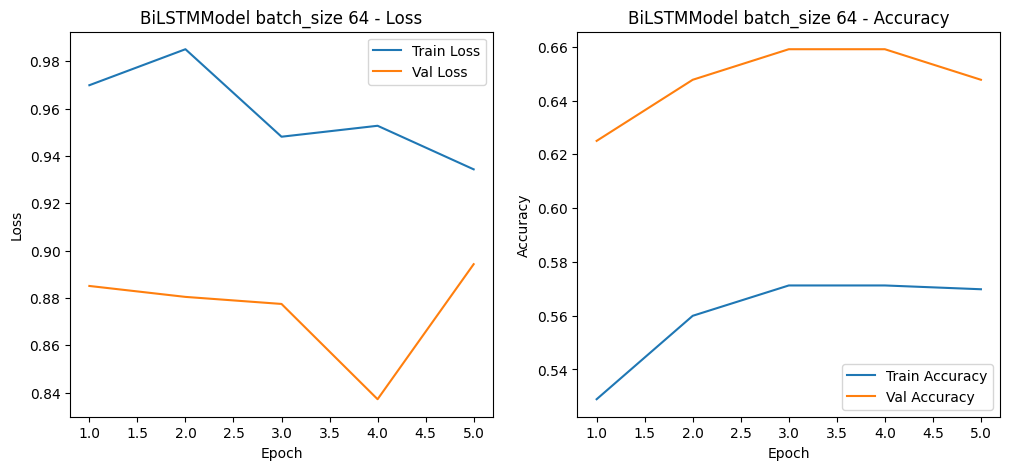

train_loss: [0.9842641172201737, 0.9359363732130631, 0.9220521475957788, 0.9226970854012863, 0.9449757441230442]
val_loss: [0.9765243530273438, 1.0128078858057659, 1.0049686034520466, 1.0269803206125896, 1.0072638591130574]
train_acc: [0.5345557122708039, 0.5514809590973202, 0.5684062059238364, 0.5684062059238364, 0.5641748942172073]
val_acc: [0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5340909090909091, 0.5454545454545454]


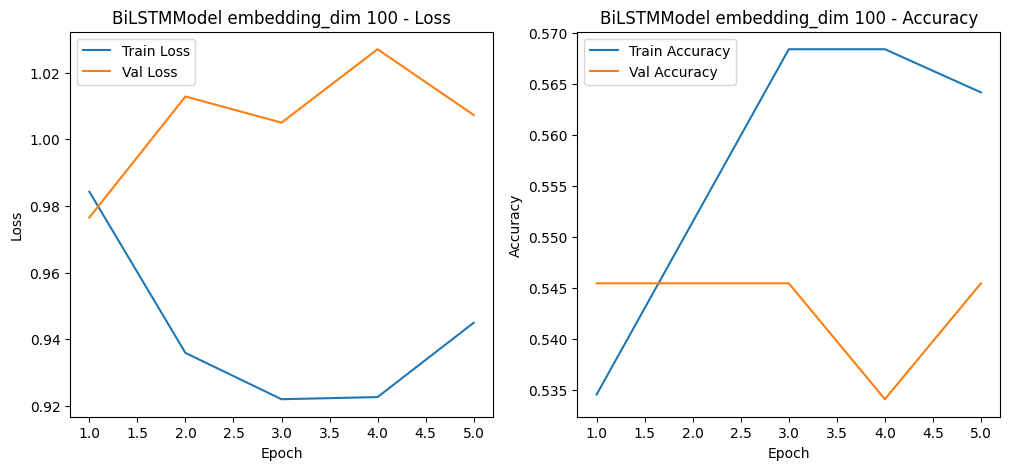

train_loss: [0.981489500273829, 0.9291027784347534, 0.9130366781483525, 0.9120854579884073, 0.9372564087743345]
val_loss: [0.8890101909637451, 0.9104710419972738, 0.9097064534823099, 0.8921139438947042, 0.9069565733273824]
train_acc: [0.5260930888575458, 0.5867418899858956, 0.5923836389280677, 0.5923836389280677, 0.5923836389280677]
val_acc: [0.6136363636363636, 0.6136363636363636, 0.6136363636363636, 0.6136363636363636, 0.6136363636363636]


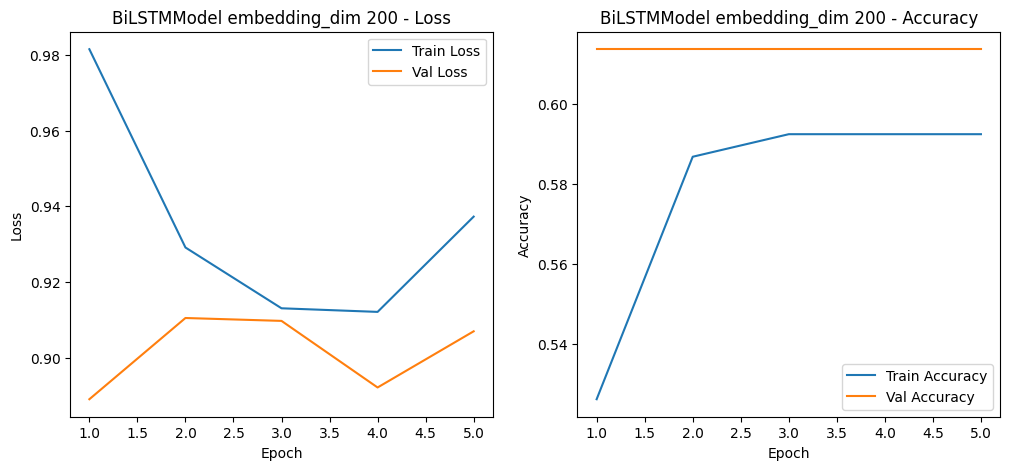

train_loss: [0.9728513645089191, 0.9188671112060547, 0.9112628491028495, 0.9033638523972553, 0.8964687715406003]
val_loss: [0.8346920212109884, 0.8234944144884745, 0.8171660304069519, 0.8108252088228861, 0.8244362076123556]
train_acc: [0.5712270803949224, 0.609308885754584, 0.609308885754584, 0.609308885754584, 0.609308885754584]
val_acc: [0.6590909090909091, 0.6590909090909091, 0.6590909090909091, 0.6590909090909091, 0.6590909090909091]


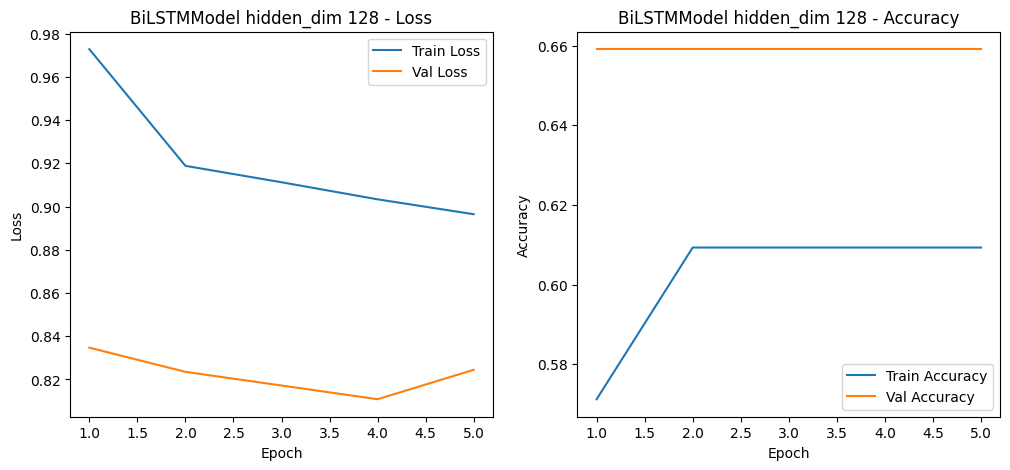

train_loss: [1.010127860566844, 0.9454847729724386, 0.9450542900873267, 0.9626127792441327, 0.9463673233985901]
val_loss: [0.9865697423617045, 0.9340258042017618, 0.9464667042096456, 0.9483528335889181, 0.9502227703730265]
train_acc: [0.5331452750352609, 0.5641748942172073, 0.5486600846262342, 0.5585331452750353, 0.5655853314527504]
val_acc: [0.5227272727272727, 0.5227272727272727, 0.5681818181818182, 0.5681818181818182, 0.5227272727272727]


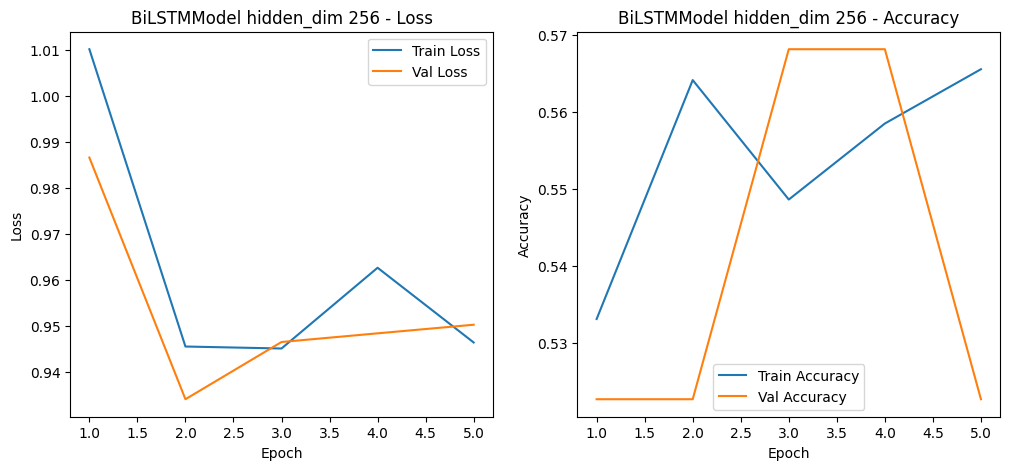

train_loss: [0.9631000653557156, 0.950046173904253, 0.934022491392882, 0.9207193462745004, 0.9258984897447669]
val_loss: [1.0052735408147175, 0.9368815422058105, 0.9392945567766825, 0.9360828200976054, 0.9413461287816366]
train_acc: [0.5528913963328632, 0.5641748942172073, 0.5839210155148096, 0.5768688293370945, 0.5853314527503526]
val_acc: [0.48863636363636365, 0.6136363636363636, 0.6136363636363636, 0.6022727272727273, 0.6022727272727273]


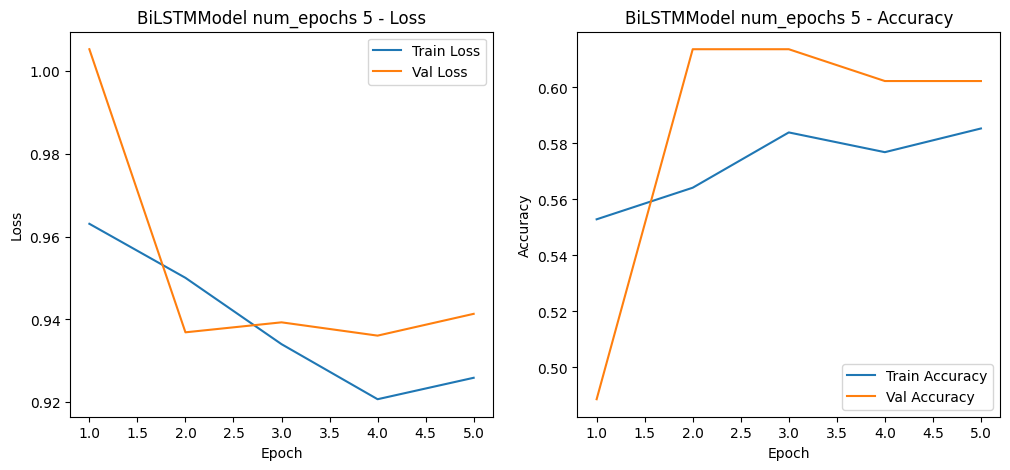

train_loss: [0.9497772532960643, 0.9041504315707994, 0.9026375879412112, 0.8955218506895978, 0.8941191823586173, 0.8791338801383972, 0.90111956389054, 0.9127086608306222, 0.8898720222970714, 0.8749435621759166]
val_loss: [0.9638570149739584, 0.9734504222869873, 0.9845366279284159, 0.9847423831621805, 0.9617860118548075, 1.0043662985165913, 0.9657556613286337, 0.9631061752637228, 0.9677216410636902, 0.9810696641604105]
train_acc: [0.5641748942172073, 0.6205923836389281, 0.6205923836389281, 0.6205923836389281, 0.6205923836389281, 0.6205923836389281, 0.6205923836389281, 0.6205923836389281, 0.6205923836389281, 0.6205923836389281]
val_acc: [0.5340909090909091, 0.5340909090909091, 0.5340909090909091, 0.5340909090909091, 0.5340909090909091, 0.5340909090909091, 0.5340909090909091, 0.5340909090909091, 0.5340909090909091, 0.5340909090909091]


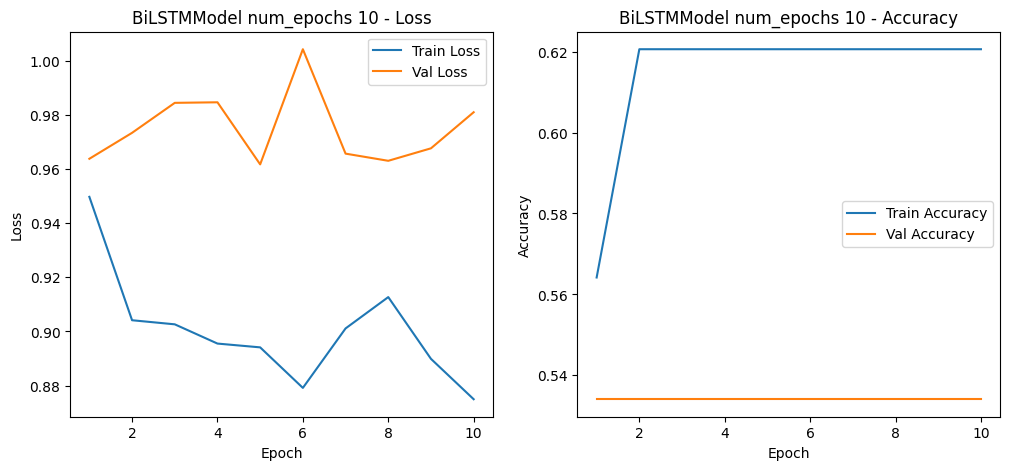

train_loss: [0.9791968309361002, 0.9138863630916761, 0.9090061680130337, 0.9030274826547374, 0.9141896263412808]
val_loss: [1.0257790088653564, 1.011369029680888, 0.9886205991109213, 1.0011796752611797, 0.99209064245224]
train_acc: [0.5571227080394923, 0.5980253878702397, 0.5980253878702397, 0.5980253878702397, 0.5980253878702397]
val_acc: [0.5795454545454546, 0.5795454545454546, 0.5795454545454546, 0.5795454545454546, 0.5795454545454546]


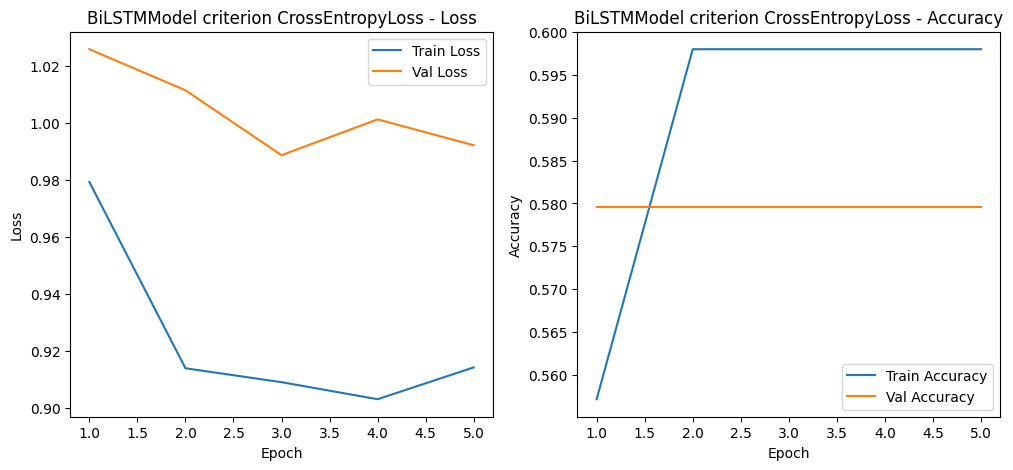

train_loss: [0.9772035246310027, 0.9299185172371243, 0.8932788838510928, 0.8941164483194766, 0.9196417409440746]
val_loss: [0.9593140482902527, 0.8761613567670187, 0.8494940400123596, 0.860392153263092, 0.8845028281211853]
train_acc: [0.5825105782792666, 0.5937940761636107, 0.609308885754584, 0.607898448519041, 0.609308885754584]
val_acc: [0.6590909090909091, 0.6590909090909091, 0.6590909090909091, 0.6590909090909091, 0.6590909090909091]


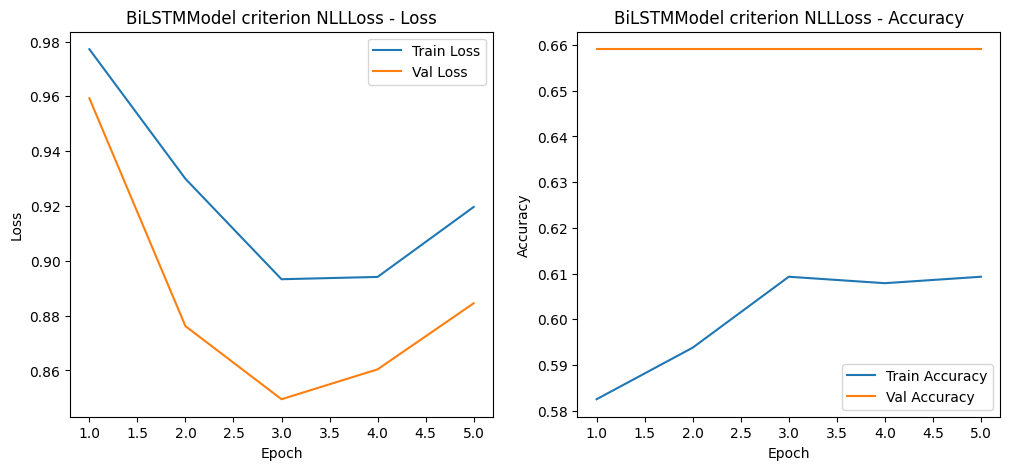

In [57]:
# 定义一个函数来创建并显示折线图
def plot_results(results):
    for result in results:
        model_name = result['model']
        hyper_name = result['hyper_name']
        param = result[hyper_name]
        lr = result['learning_rate']
        opt = result['optimizer']
        num_epochs = result['num_epochs']
        batch_size = result['batch_size']
        criterion_name = result['criterion']
        embedding_dim = result['embedding_dim']
        hidden_dim = result['hidden_dim']

        # 确认 train_loss 和 train_acc 是列表
        train_loss = [float(x) for x in result['train_loss']] if isinstance(result['train_loss'], list) else [float(result['train_loss'])]
        val_loss = [float(x) for x in result['val_loss']] if isinstance(result['val_loss'], list) else [float(result['val_loss'])]
        train_acc = [float(x) for x in result['train_acc']] if isinstance(result['train_acc'], list) else [float(result['train_acc'])]
        val_acc = [float(x) for x in result['val_acc']] if isinstance(result['val_acc'], list) else [float(result['val_acc'])]

        print(f"train_loss: {train_loss}")
        print(f"val_loss: {val_loss}")
        print(f"train_acc: {train_acc}")
        print(f"val_acc: {val_acc}")

        plt.figure(figsize=(12, 5))

        # 绘制损失图
        plt.subplot(1, 2, 1)
        plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss')
        plt.plot(range(1, len(val_loss) + 1), val_loss, label='Val Loss')
        plt.title(f'{model_name} {hyper_name} {param} - Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        # 绘制准确率图
        plt.subplot(1, 2, 2)
        plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train Accuracy')
        plt.plot(range(1, len(val_acc) + 1), val_acc, label='Val Accuracy')
        plt.title(f'{model_name} {hyper_name} {param} - Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.show()

plot_results(results)